In [1]:
library(Seurat)
library(SeuratWrappers)
library(harmony)
library(SeuratDisk)
library(dplyr)
library(ggplot2)
library(tidyr)
library(scales)

Attaching SeuratObject

Le chargement a nécessité le package : Rcpp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
options(repr.plot.width=20, repr.plot.height=20) # To set the figure size in Jupyter

In [3]:
embryo<-readRDS("/home/adufour/work/rds_storage/all_cells/embryo_allstages.rds")

In [4]:
assay <- GetAssayData(object = embryo, slot = "counts")

In [5]:
embryo <- NormalizeData(embryo) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose = FALSE)
embryo.integrated <- RunHarmony(embryo, group.by.vars = "SAMP")

Centering and scaling data matrix

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


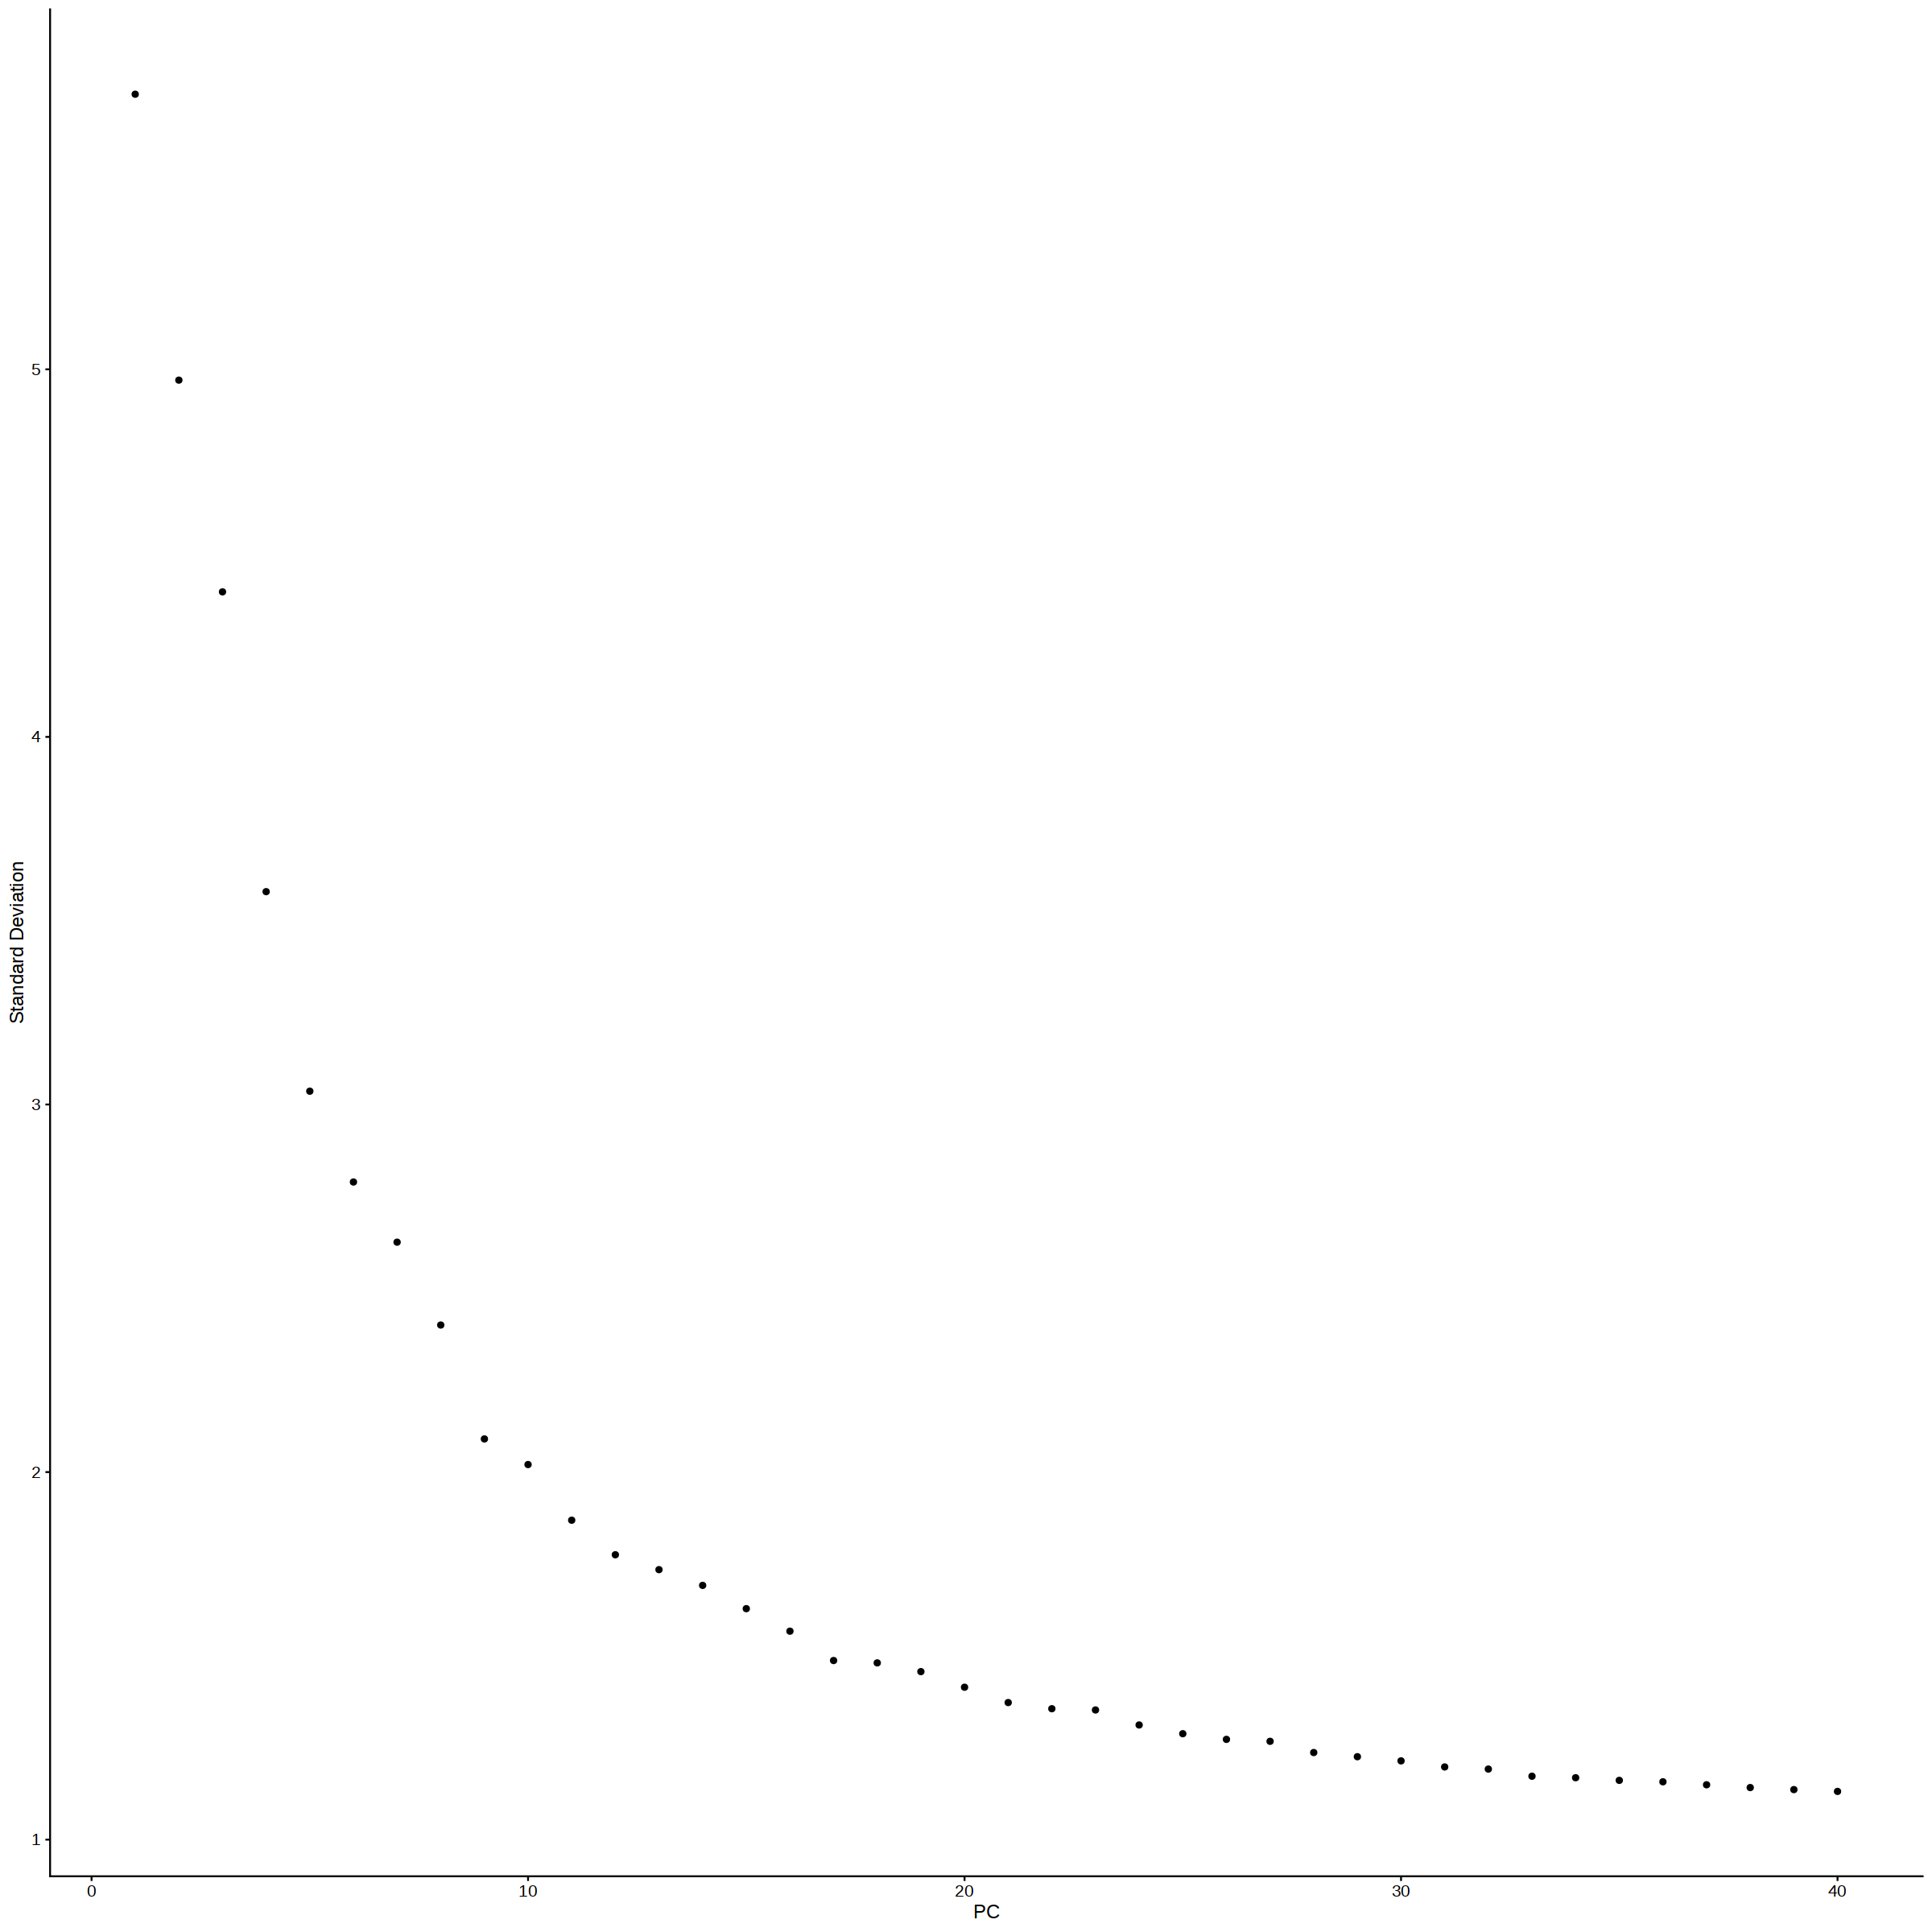

In [6]:
ElbowPlot(embryo.integrated, ndims = 40)

In [7]:
embryo.integrated <- RunUMAP(embryo.integrated, dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:23:14 UMAP embedding parameters a = 0.9922 b = 1.112

10:23:14 Read 34888 rows and found 30 numeric columns

10:23:14 Using Annoy for neighbor search, n_neighbors = 30

10:23:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:23:19 Writing NN index file to temp file /tmp/Rtmpg3jxSz/file48e639ec83b6

10:23:19 Searching Annoy index using 1 thread, search_k = 3000

10:23:34 Annoy recall = 100%

10:23:35 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

In [8]:
embryo.integrated <- FindNeighbors(embryo.integrated, reduction = "harmony", dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [9]:
embryo.integrated <- FindClusters(embryo.integrated, resolution = 0.05)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 34888
Number of edges: 1197707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9769
Number of communities: 7
Elapsed time: 11 seconds


1 singletons identified. 6 final clusters.



In [11]:
embryo.integrated$cell_type_time <- paste(embryo.integrated@meta.data$cell_type, embryo.integrated@meta.data$TIME, sep = "_")

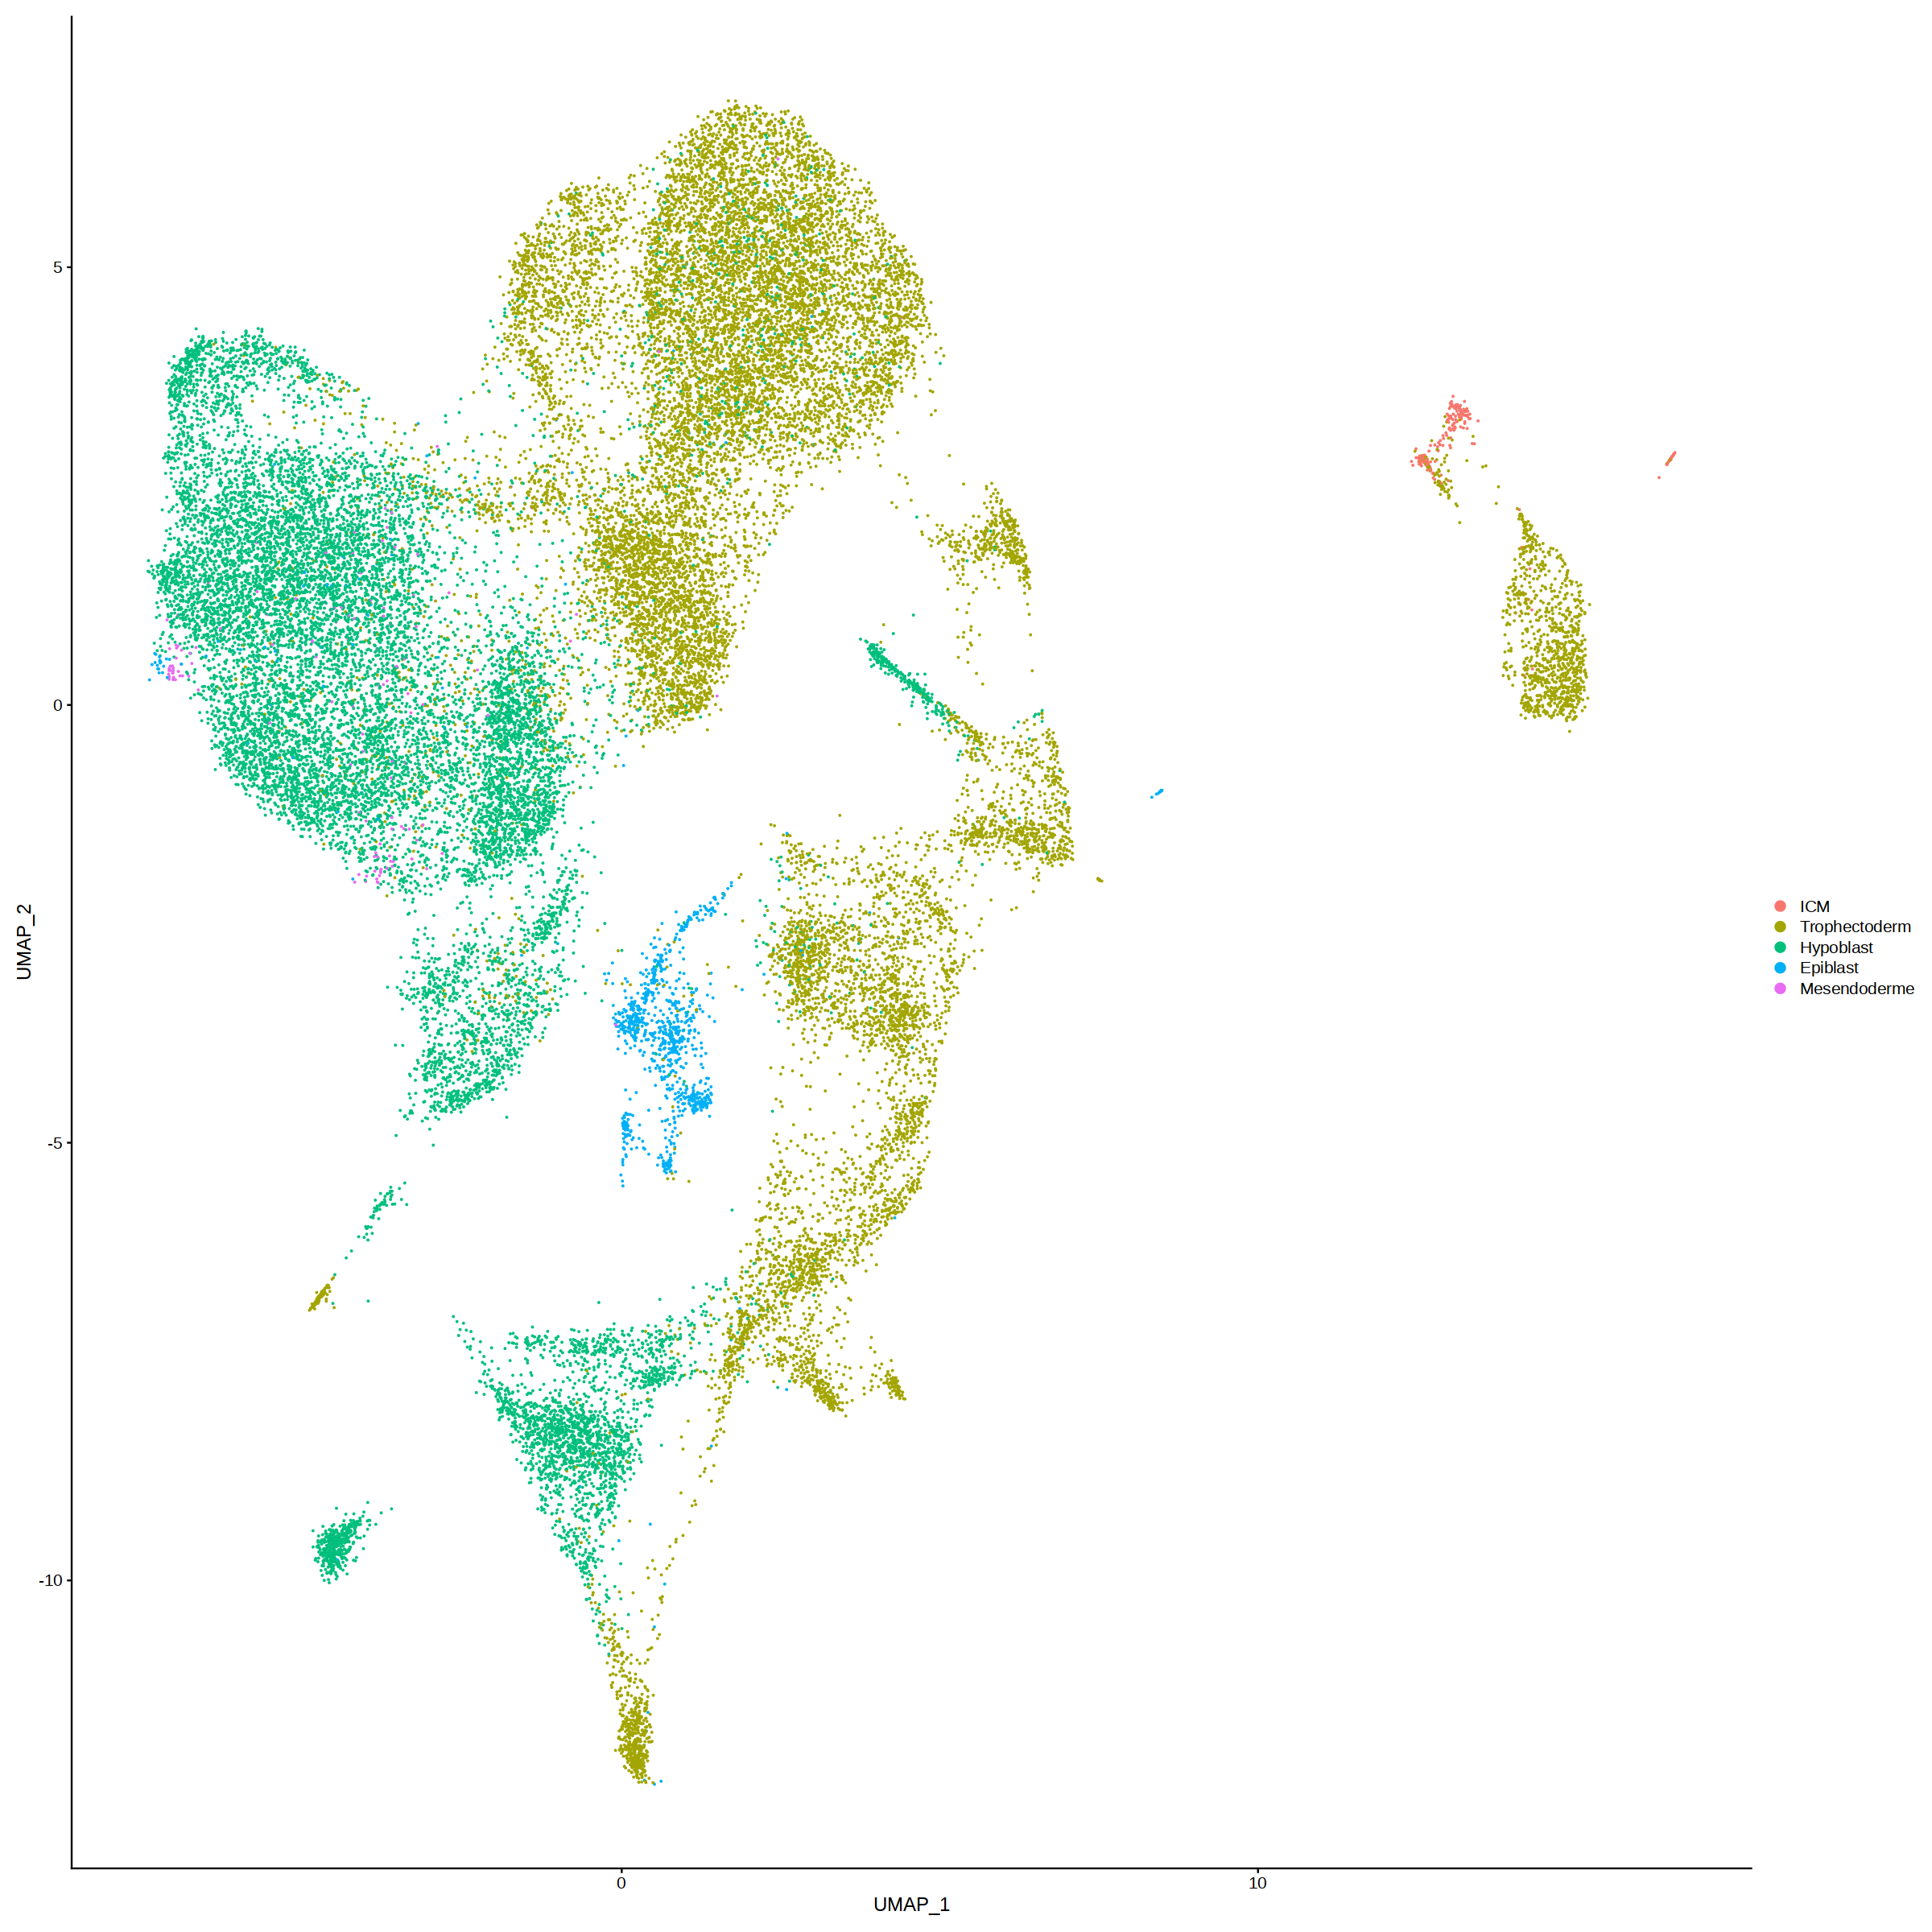

In [13]:
Idents(embryo.integrated) <- "cell_type"
DimPlot(embryo.integrated)

In [14]:
Idents(object = embryo.integrated) <- "TIME"

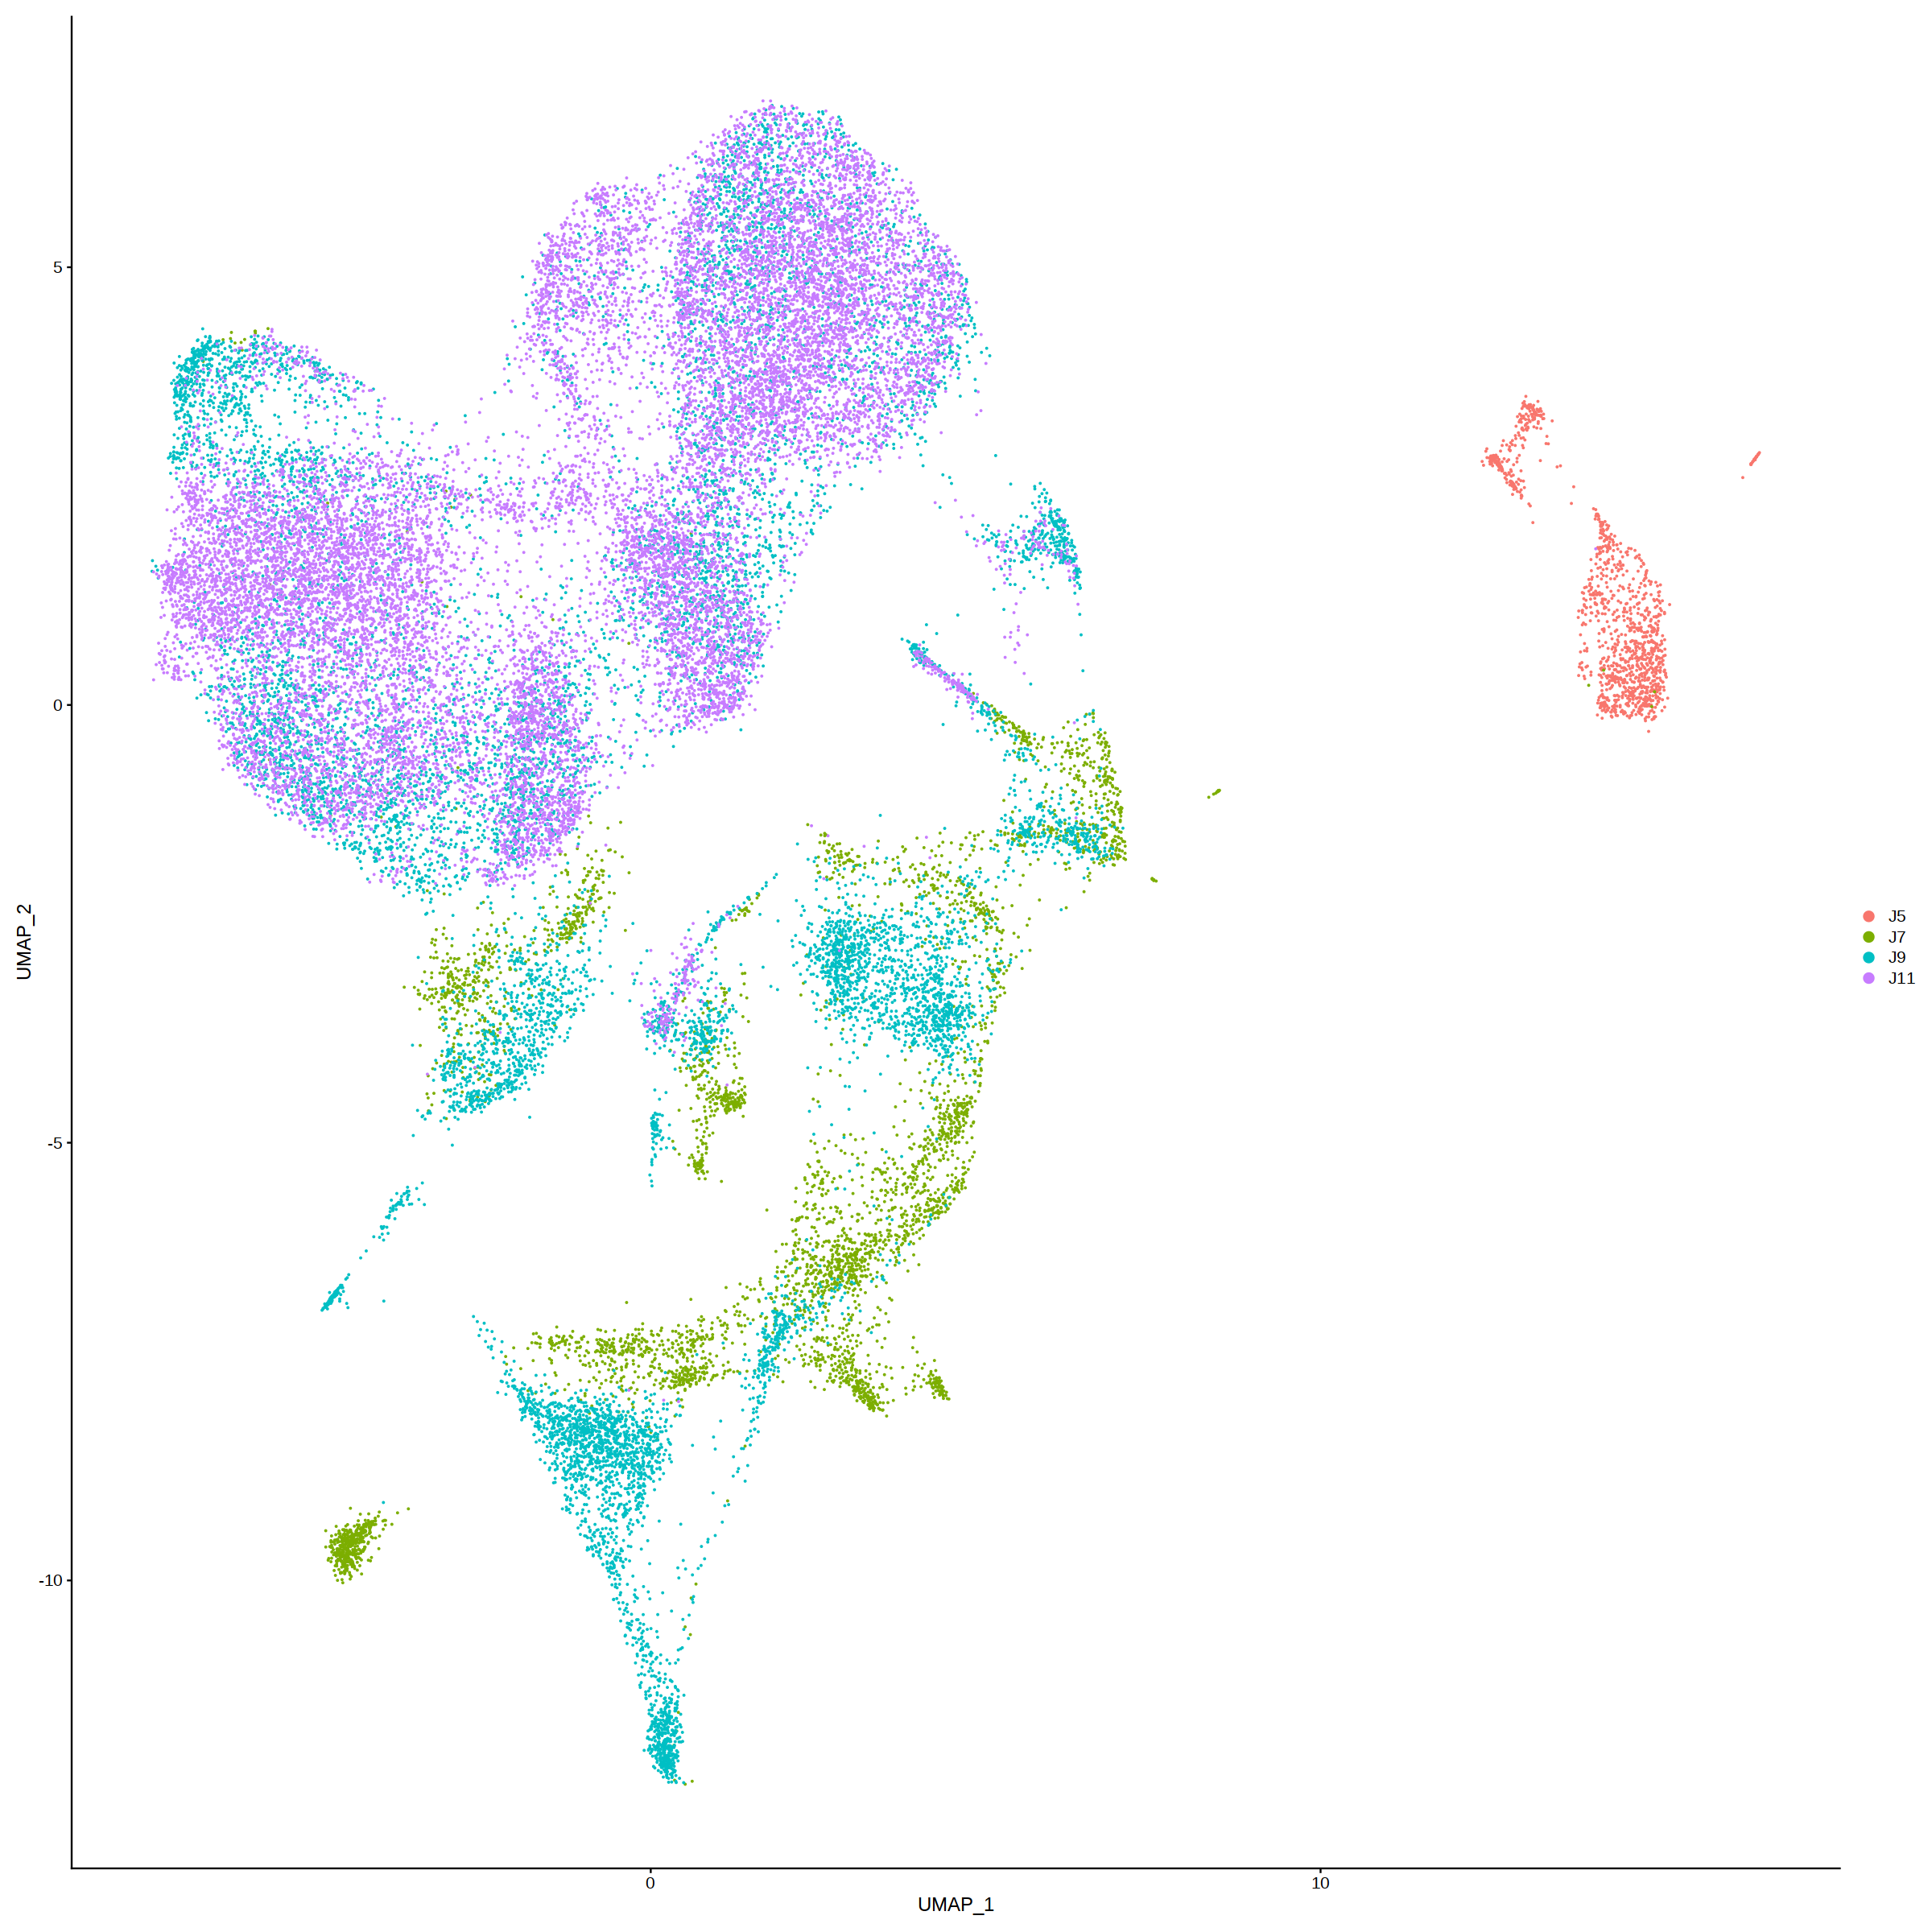

In [15]:
DimPlot(embryo.integrated, reduction = "umap")

In [16]:
custom_colors <- list()

colors_dutch <- c(
  '#FFC312','#C4E538','#12CBC4','#FDA7DF','#ED4C67',
  '#F79F1F','#A3CB38','#1289A7','#D980FA','#B53471',
  '#EE5A24','#009432','#0652DD','#9980FA','#833471',
  '#EA2027','#006266','#1B1464','#5758BB','#6F1E51'
)

colors_spanish <- c(
  '#40407a','#706fd3','#f7f1e3','#34ace0','#33d9b2',
  '#2c2c54','#474787','#aaa69d','#227093','#218c74',
  '#ff5252','#ff793f','#d1ccc0','#ffb142','#ffda79',
  '#b33939','#cd6133','#84817a','#cc8e35','#ccae62'
)

custom_colors$discrete <- c(colors_dutch, colors_spanish)

custom_colors$cell_cycle <- setNames(
  c('#45aaf2', '#f1c40f', '#e74c3c', '#7f8c8d'),
  c('G1',      'S',       'G2M',     '-')
)

In [17]:
embryo_hypo <- subset(x = embryo.integrated, subset = cell_type == "Hypoblast")

In [18]:
embryo_hypo <- RunPCA(embryo_hypo)

PC_ 1 
Positive:  UPP1, ENSSSCG00000037142, ENSSSCG00000010792, ENSSSCG00000032129, GM2A, ENSSSCG00000011290, HSD11B1L, CSRP2, NPC2, PTGES 
	   ENSSSCG00000017061, ENSSSCG00000013260, HSD17B1, RPS29, ENSSSCG00000001543, TMEM254, RPS17, PDXK, ENSSSCG00000016284, CTSD 
	   ALDH1L2, PSAP, LGMN, RDH16, RIMKLB, ENSSSCG00000015069, GATA2, MRPL57, ENSSSCG00000028850, RPL38 
Negative:  ENSSSCG00000016548, FN1, ENSSSCG00000022925, ENSSSCG00000044700, COL18A1, EMP1, LAMC1, LAMA1, COL4A2, FLRT3 
	   ADAMTS1, SLC20A1, SERPINH1, ENSSSCG00000037832, FBLN2, P3H1, AKAP12, FST, LAMB1, NID2 
	   GPRC5B, NID1, PXDN, PAQR8, SLC23A2, CCN1, SLC12A2, LDLR, QSOX1, ADAMTS9 
PC_ 2 
Positive:  ENSSSCG00000045321, ND2, COX3, COX2, ND5, GM2A, COX1, PSAP, ND3, ENSSSCG00000017061 
	   ENSSSCG00000010792, ND4, CYTB, HSD17B1, CSRP2, ND1, TMEM254, ENSSSCG00000016284, ENSSSCG00000032599, NPC2 
	   ALDH1L2, RIMKLB, IVNS1ABP, ENSSSCG00000013260, PTGES, ENSSSCG00000003451, ND4L, ATP6, RDH16, LRRC43 
Negative:  ENSSSCG00000

# Vizualization and clustering

In [19]:
embryo_hypo <- RunUMAP(embryo_hypo, dims = 1:20)

10:25:13 UMAP embedding parameters a = 0.9922 b = 1.112

10:25:13 Read 15335 rows and found 20 numeric columns

10:25:13 Using Annoy for neighbor search, n_neighbors = 30

10:25:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:25:15 Writing NN index file to temp file /tmp/Rtmpg3jxSz/file48e61c41bd34

10:25:15 Searching Annoy index using 1 thread, search_k = 3000

10:25:21 Annoy recall = 100%

10:25:22 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:25:23 Initializing from normalized Laplacian + noise (using irlba)

10:25:24 Commencing optimization for 200 epochs, with 671786 positive edges

10:25:44 Optimization finished



In [20]:
embryo_hypo <- FindNeighbors(embryo_hypo, dims = 1:20)

Computing nearest neighbor graph

Computing SNN



In [21]:
embryo_hypo <- FindClusters(embryo_hypo, resolution = 0.05)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15335
Number of edges: 496835

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9665
Number of communities: 4
Elapsed time: 3 seconds


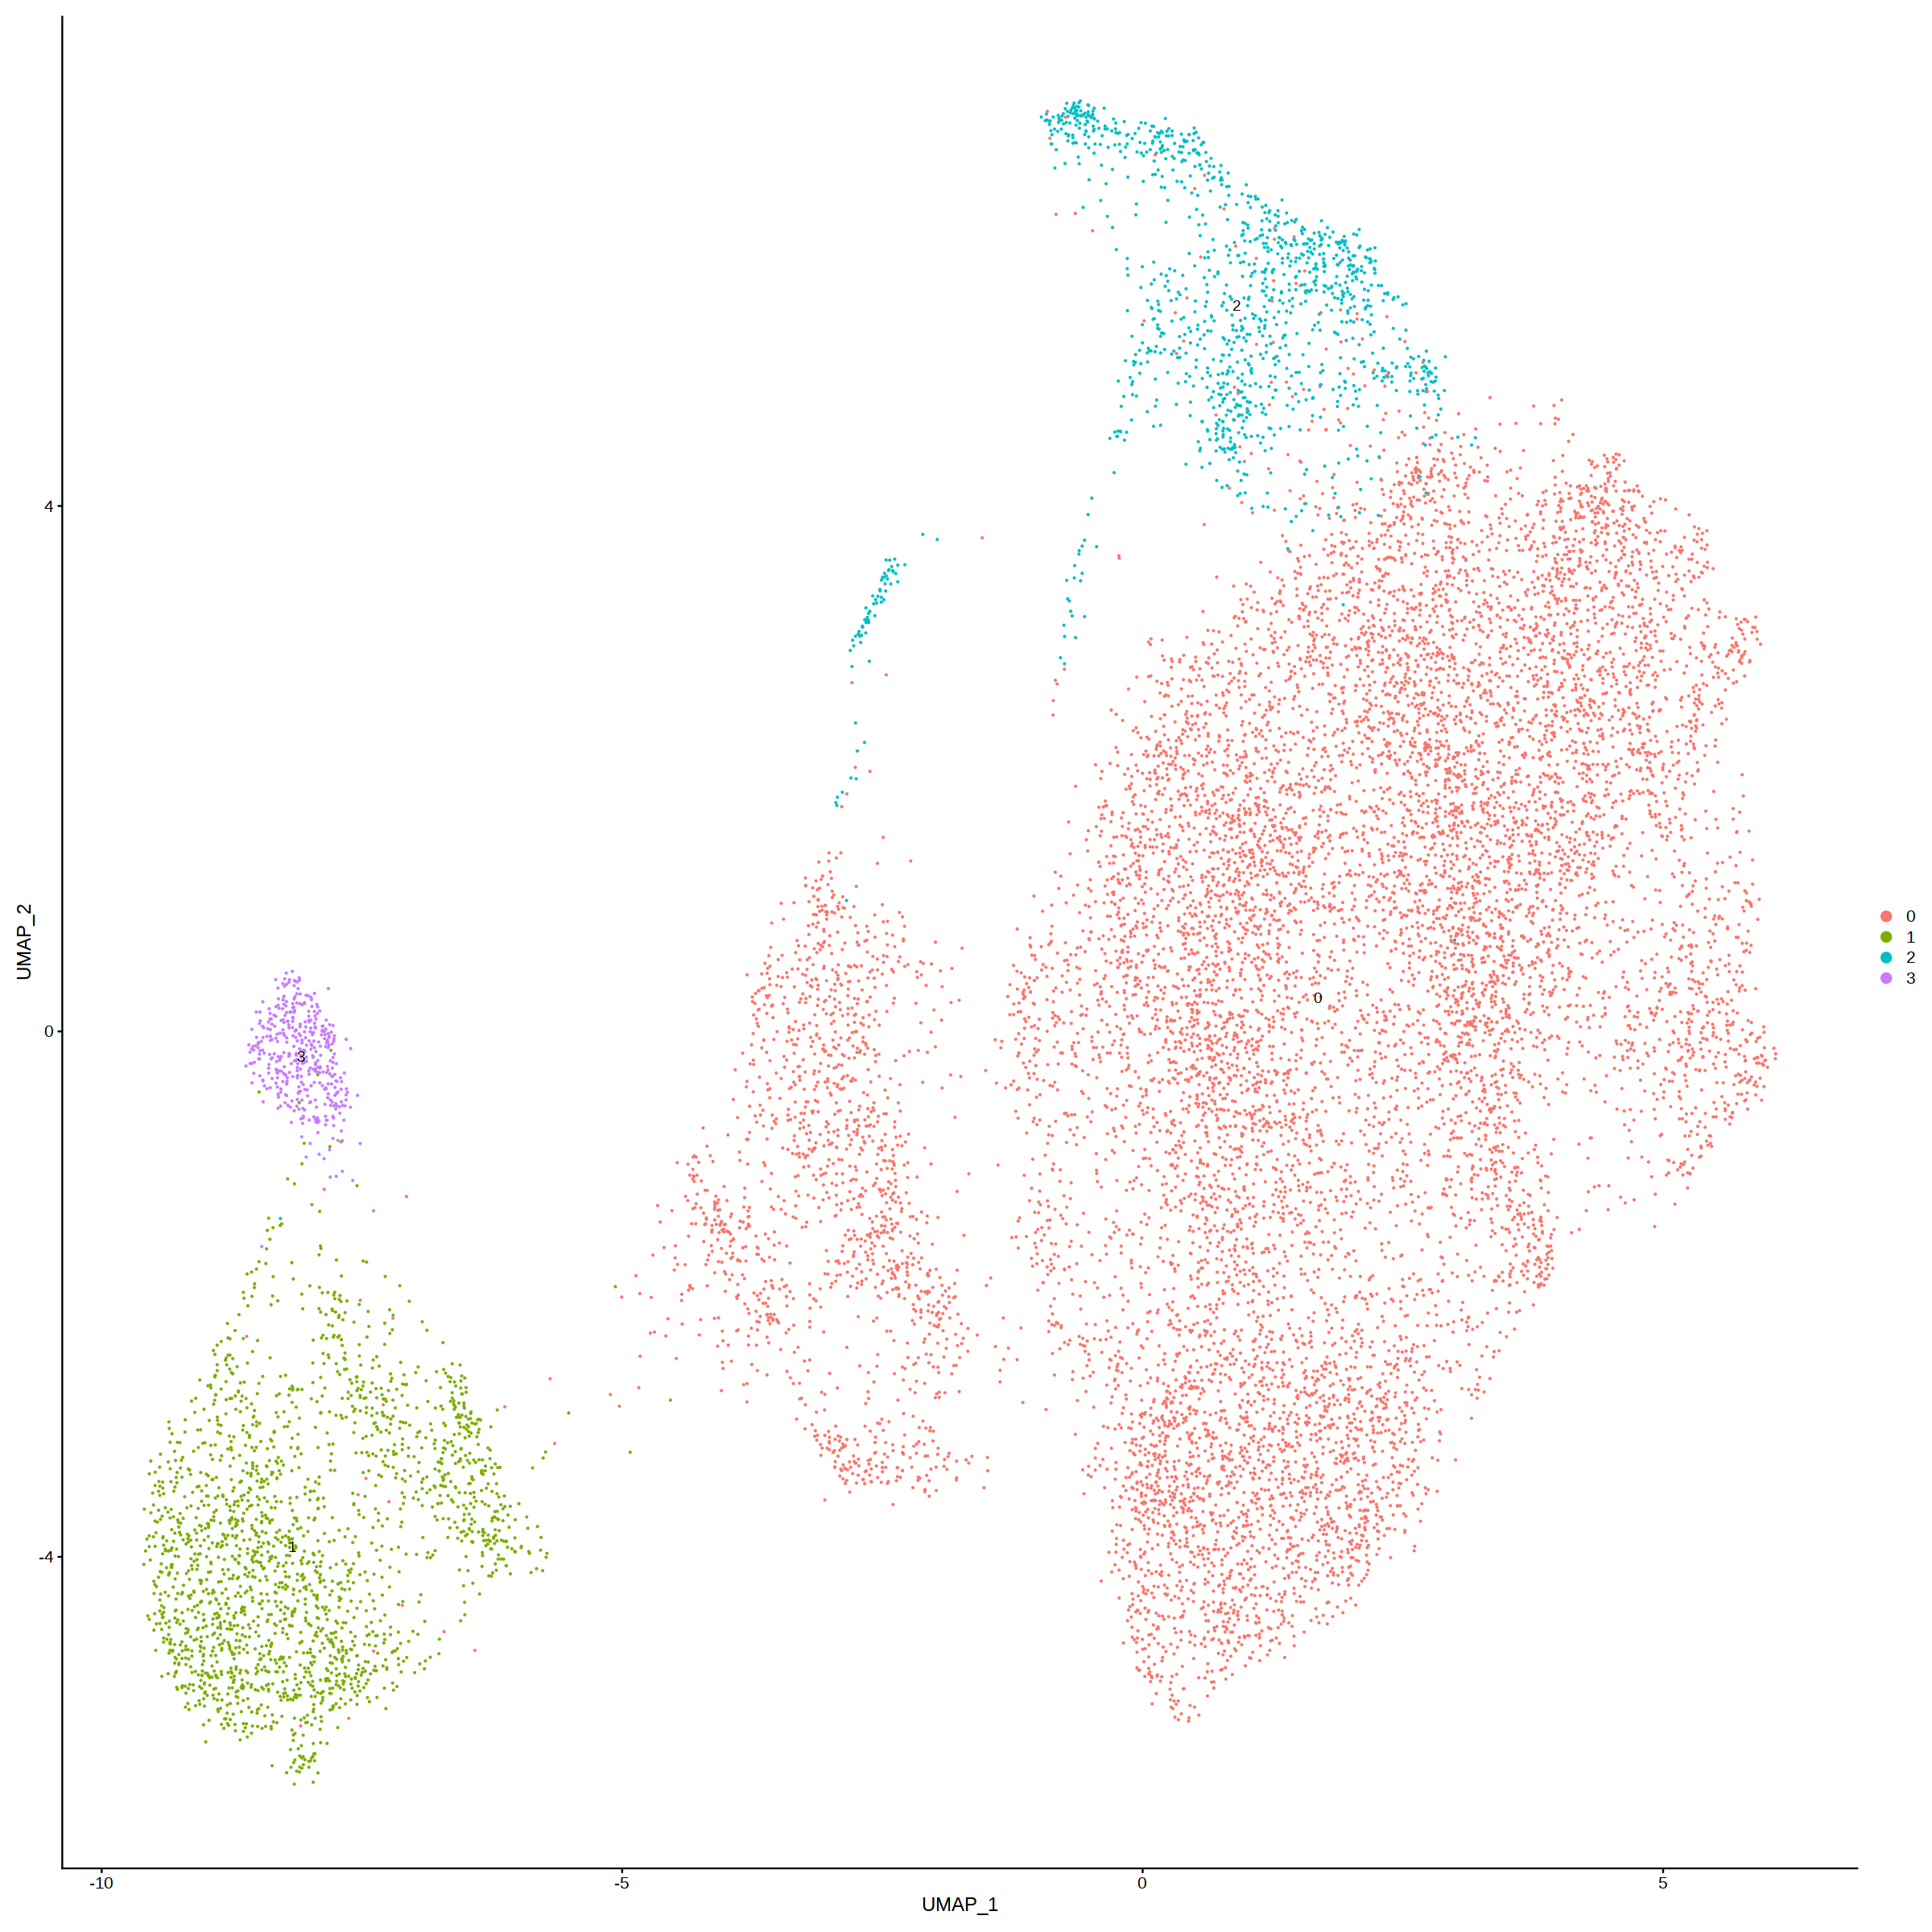

In [22]:
DimPlot(embryo_hypo, label = TRUE, reduction = "umap")

In [23]:
Idents(object = embryo_hypo) <- "Phase"

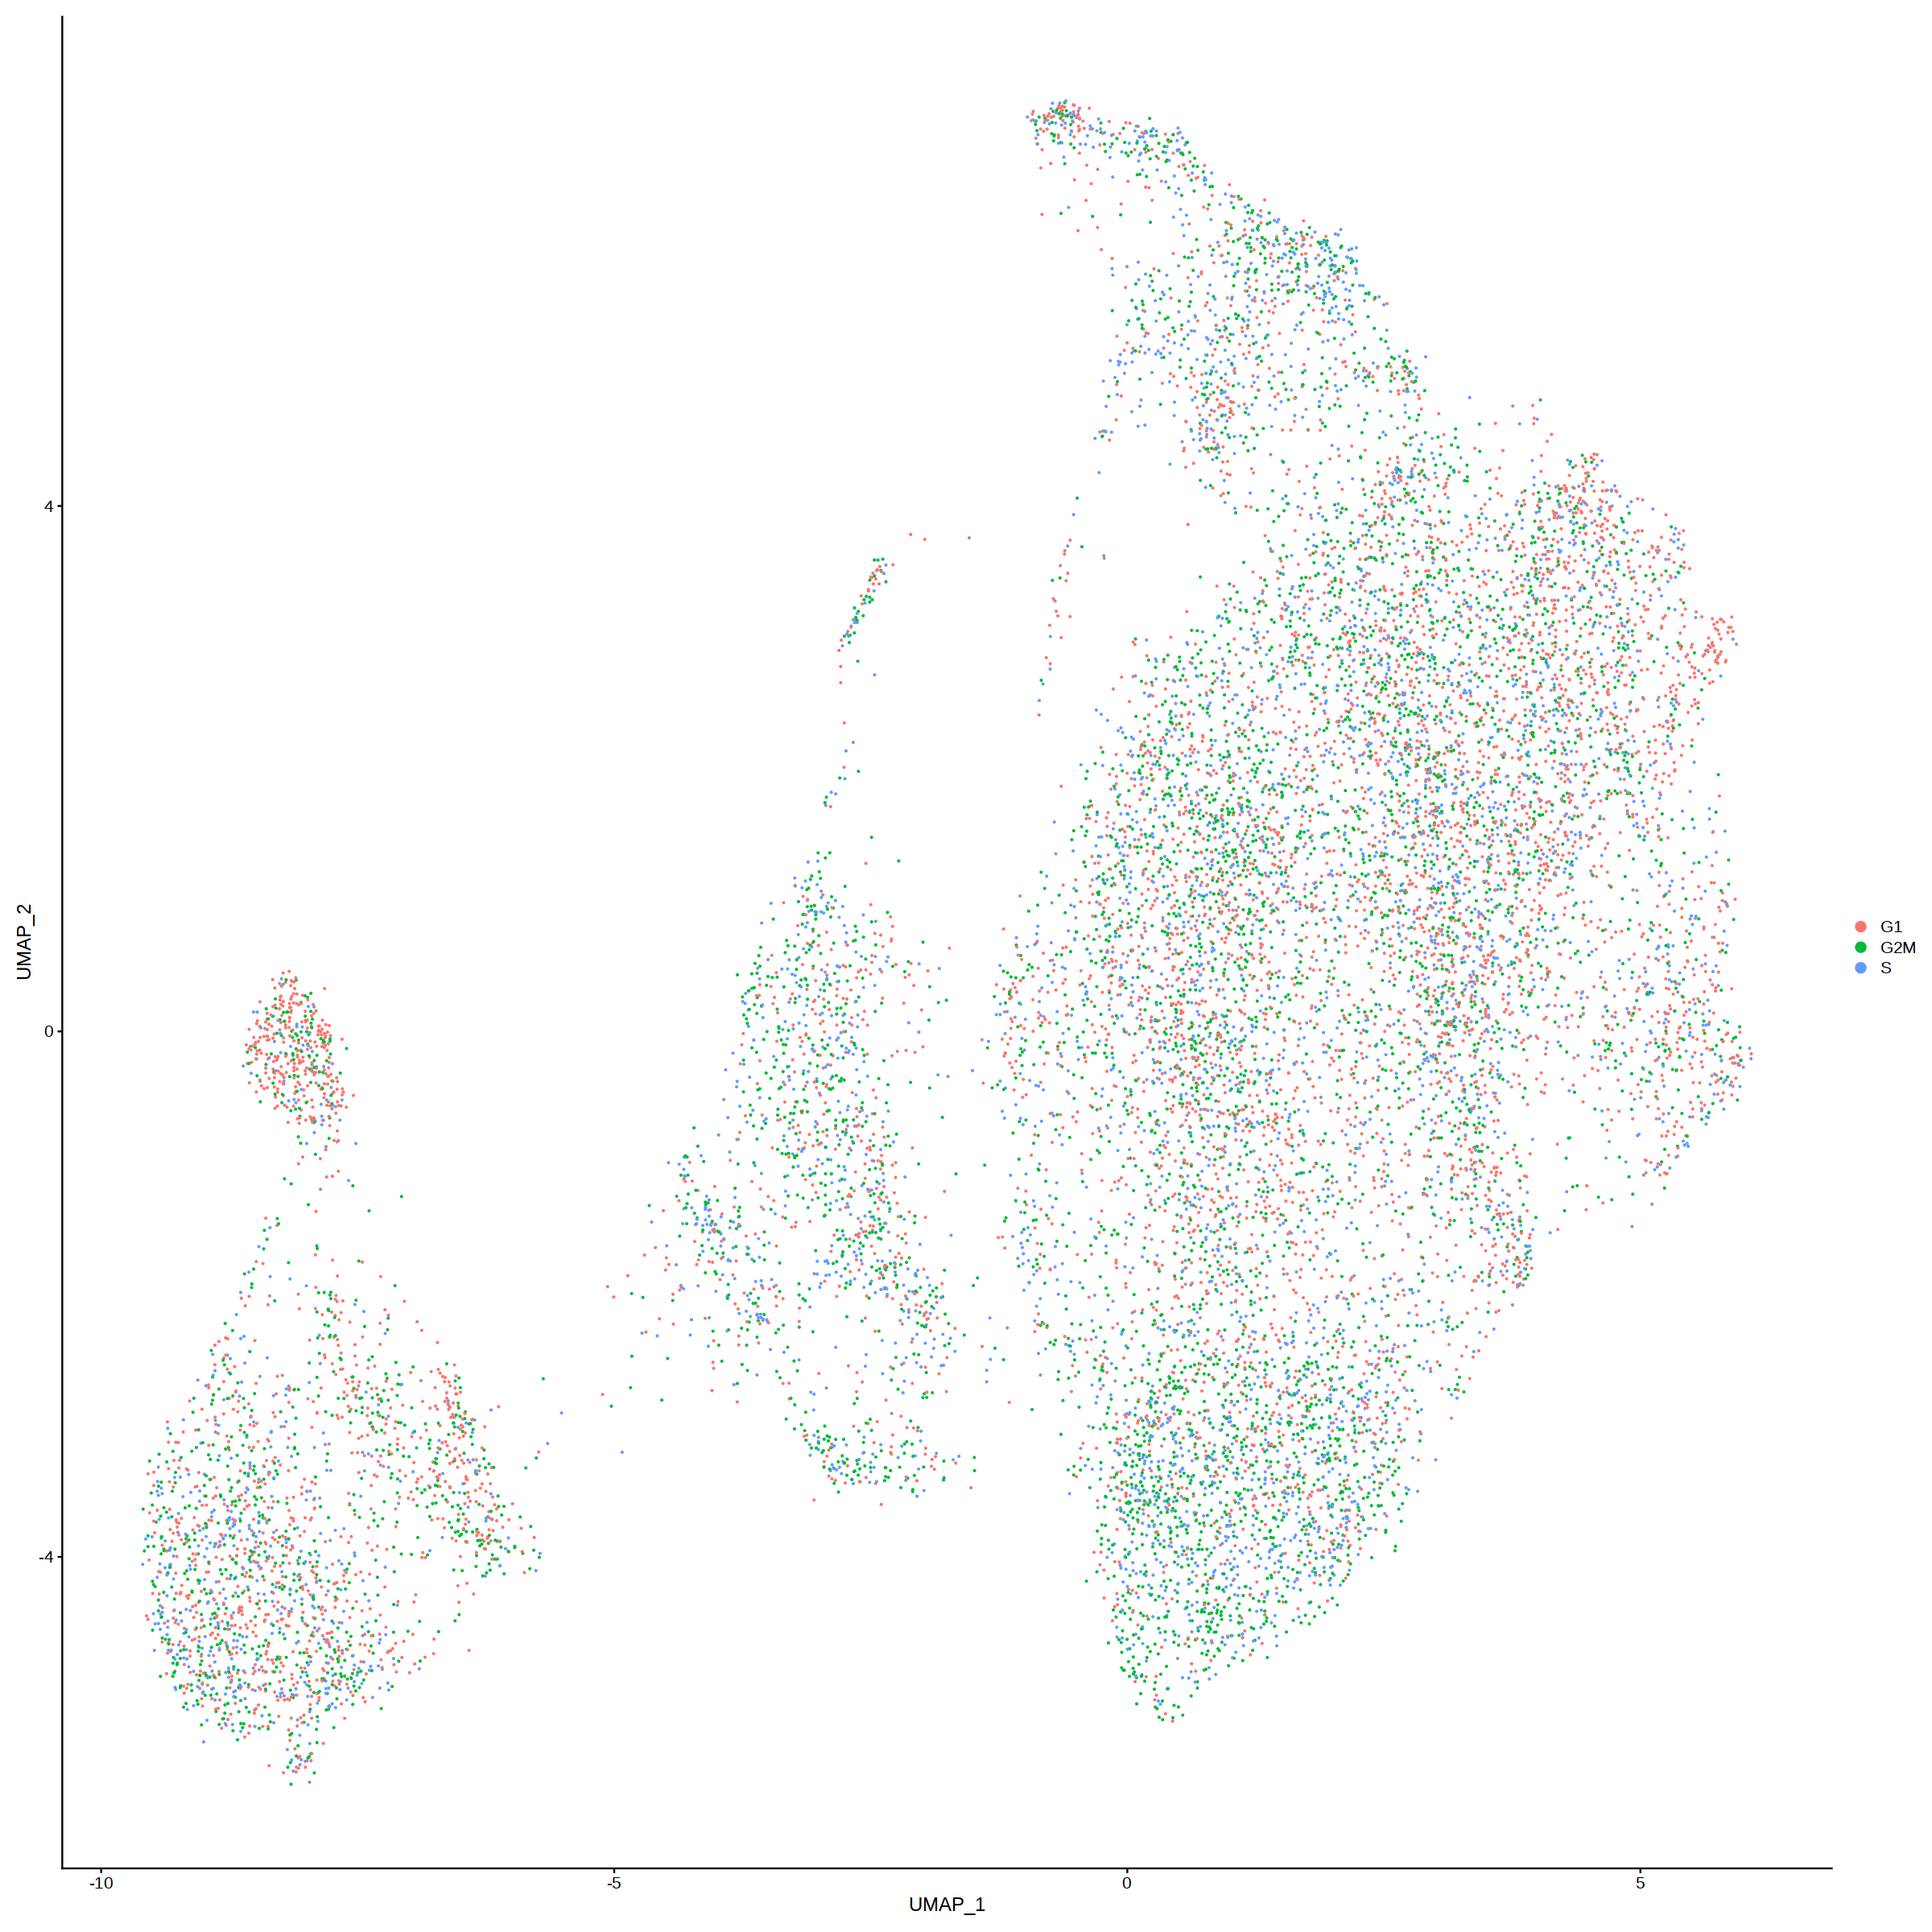

In [24]:
DimPlot(embryo_hypo, reduction = "umap")

In [25]:
table(embryo_hypo@meta.data$Phase, embryo_hypo@meta.data$seurat_clusters)

     
         0    1    2    3
  G1  4397  858  363  266
  G2M 3981  682  383   90
  S   3362  453  450   50

In [26]:
Idents(object = embryo_hypo) <- "seurat_clusters"
new.cluster.ids <- c("HYPO Ma", "HYPO In", "HYPO Ve", "HYPO Ea")
names(new.cluster.ids) <- levels(embryo_hypo)
embryo_hypo <- RenameIdents(embryo_hypo, new.cluster.ids)
embryo_hypo$seurat_clusters <- Idents(embryo_hypo)

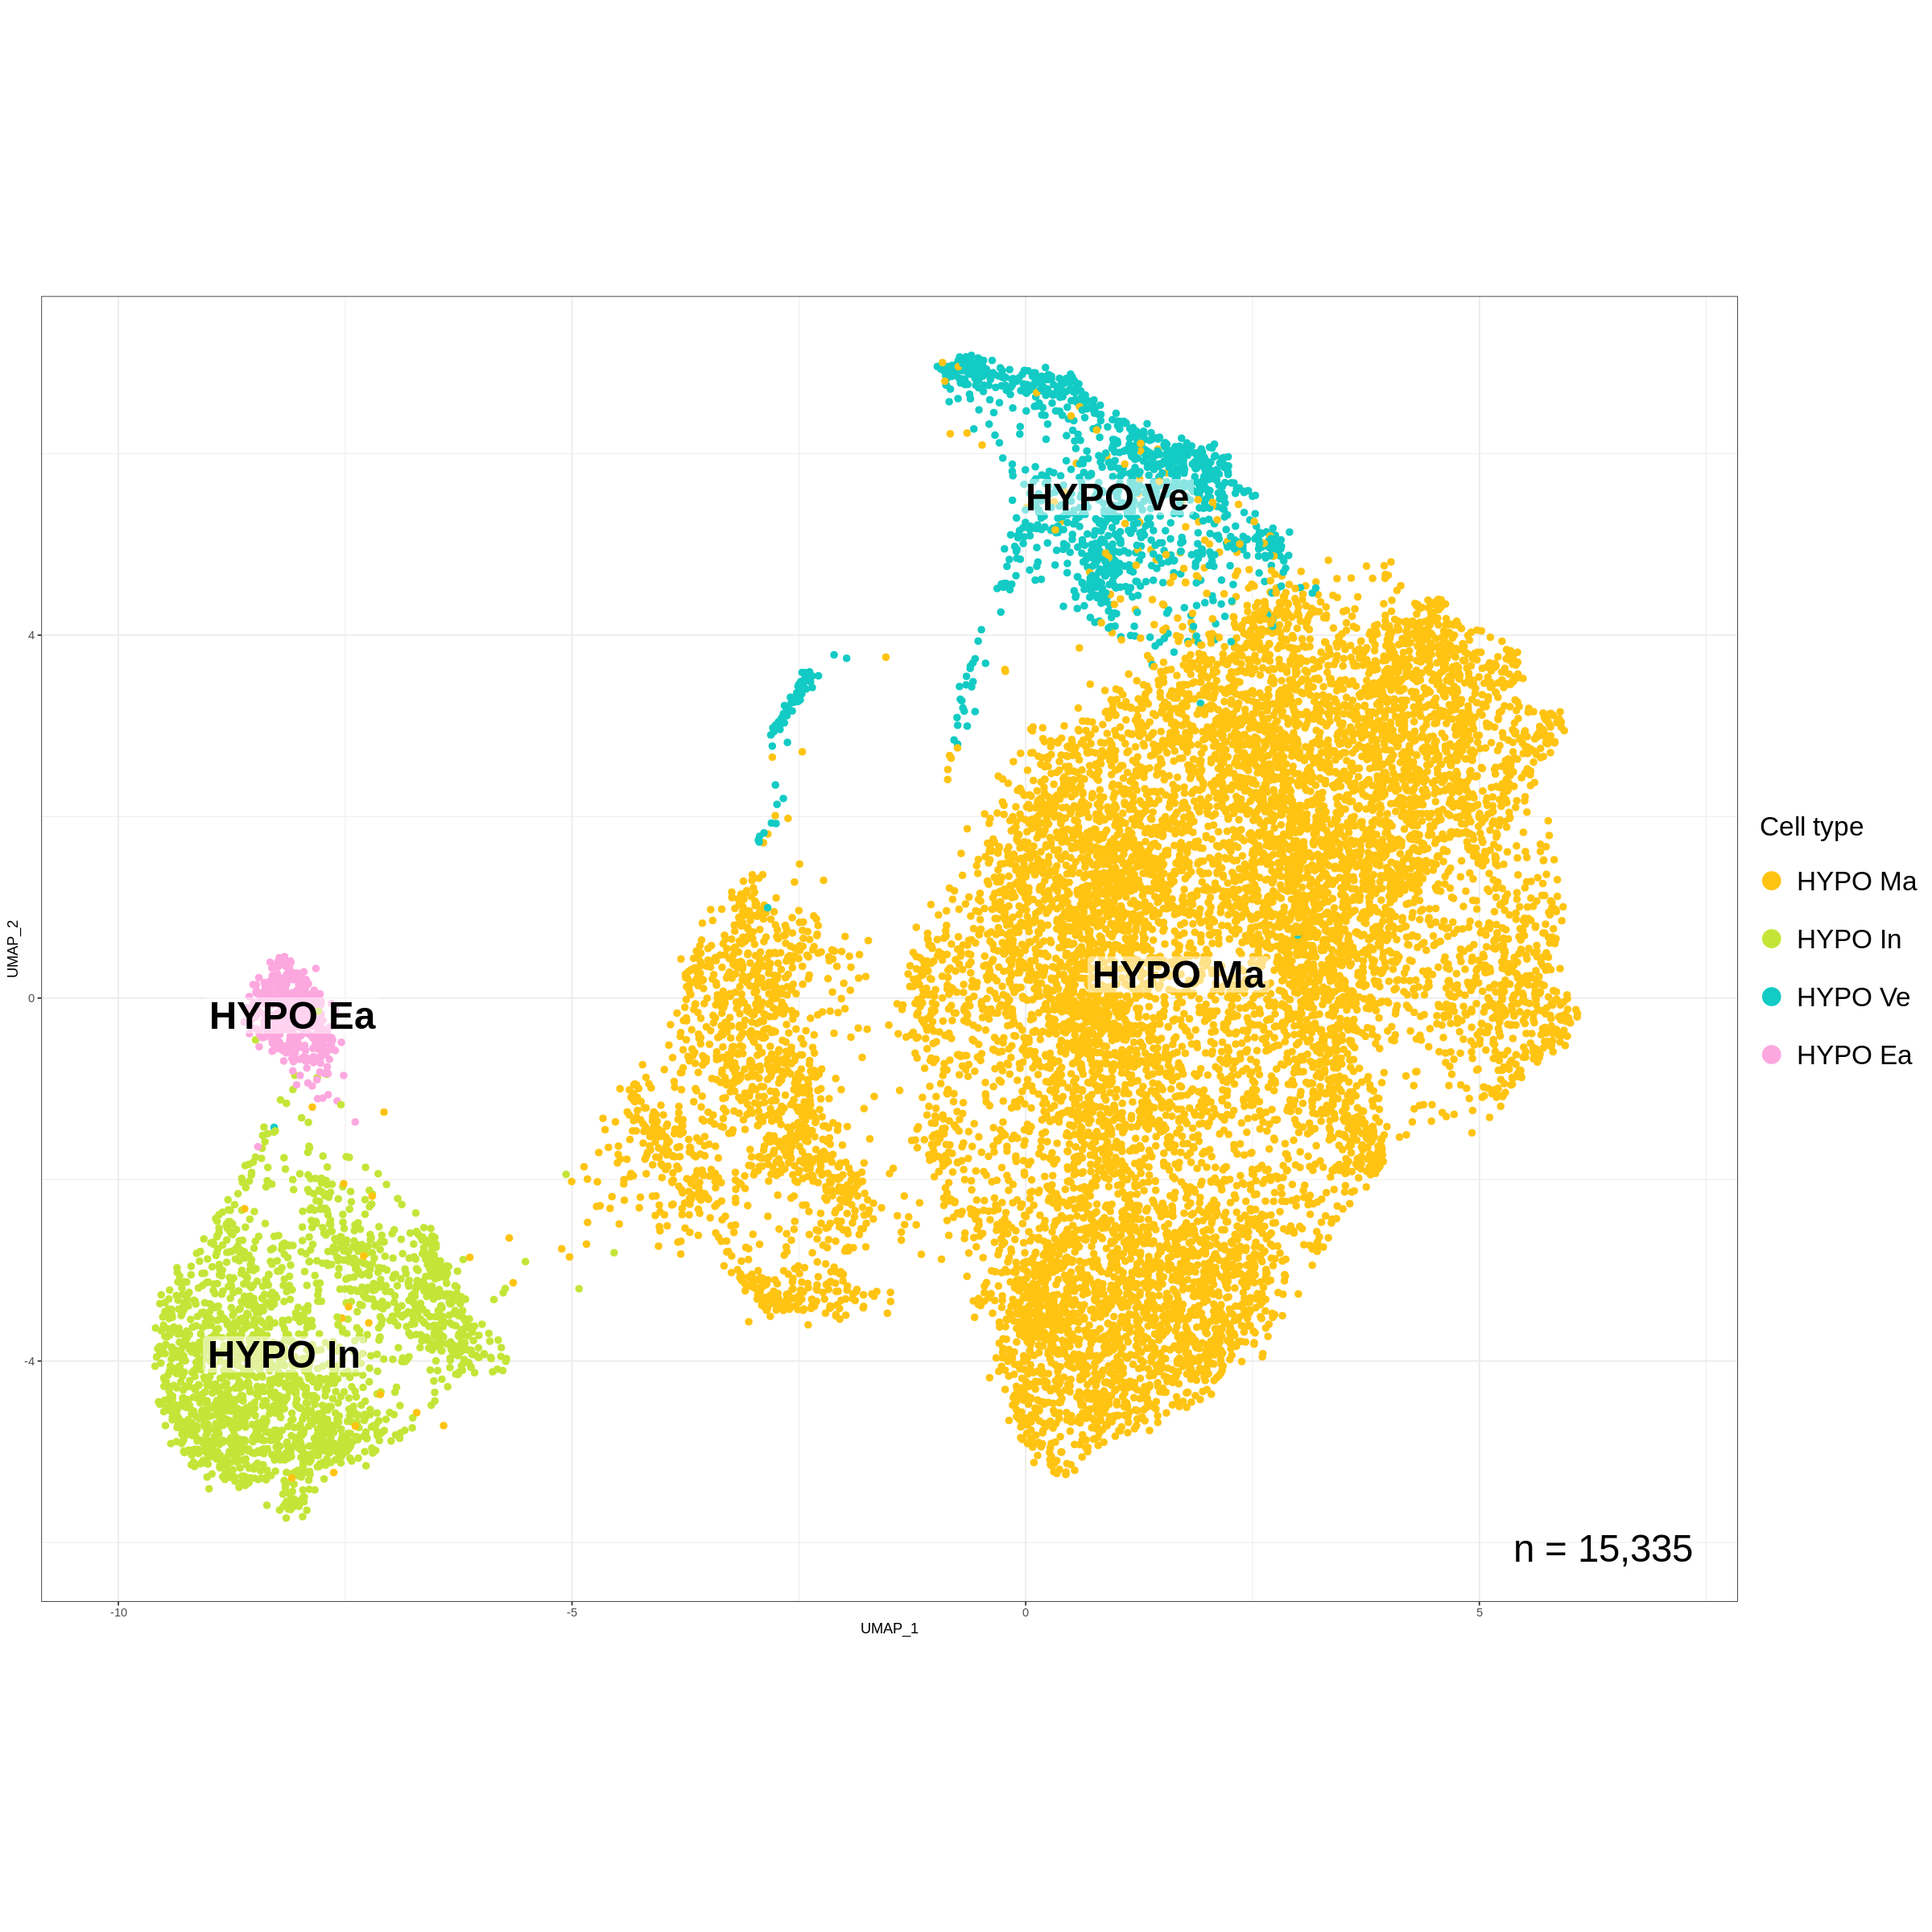

In [27]:
UMAP_centers_cell_type <- tibble(
    UMAP_1 = as.data.frame(embryo_hypo@reductions$umap@cell.embeddings)$UMAP_1,
    UMAP_2 = as.data.frame(embryo_hypo@reductions$umap@cell.embeddings)$UMAP_2,
    seurat_clusters = embryo_hypo@meta.data$seurat_clusters
  ) %>%
  group_by(seurat_clusters) %>%
  summarize(x = median(UMAP_1), y = median(UMAP_2))

p <- bind_cols(embryo_hypo@meta.data, as.data.frame(embryo_hypo@reductions$umap@cell.embeddings)) %>%
  ggplot(aes(UMAP_1, UMAP_2, color = seurat_clusters)) +
  geom_point(size = 2) +
  geom_label(
    data = UMAP_centers_cell_type,
    mapping = aes(x, y, label = seurat_clusters),
    size = 10,
    fill = 'white',
    color = 'black',
    fontface = 'bold',
    alpha = 0.5,
    label.size = 0,
    show.legend = FALSE
  ) +
  theme_bw() +
  expand_limits(x = c(-10,7), y = c(-6,7)) +
  scale_color_manual(values = custom_colors$discrete) +
  labs(color = 'Cell type') +
  guides(colour = guide_legend(override.aes = list(size = 6))) +
  theme(legend.position = 'right',legend.title = element_text(size = 20),legend.text = element_text(size = 20), legend.key.height=unit(3,"line")) +
  coord_fixed() +
  annotate(
    geom = 'text', x = Inf, y = -Inf,
    label = paste0('n = ', format(nrow(embryo_hypo@meta.data), big.mark = ',', trim = TRUE)),
    vjust = -1.5, hjust = 1.25, color = 'black', size = 10
  )

p

In [42]:
embryo_hypo@meta.data$cell_type <- as.character(embryo_hypo@meta.data$seurat_clusters)

In [43]:
saveRDS(embryo_hypo, '/home/adufour/work/rds_storage/tissue/hypo_processed.rds')

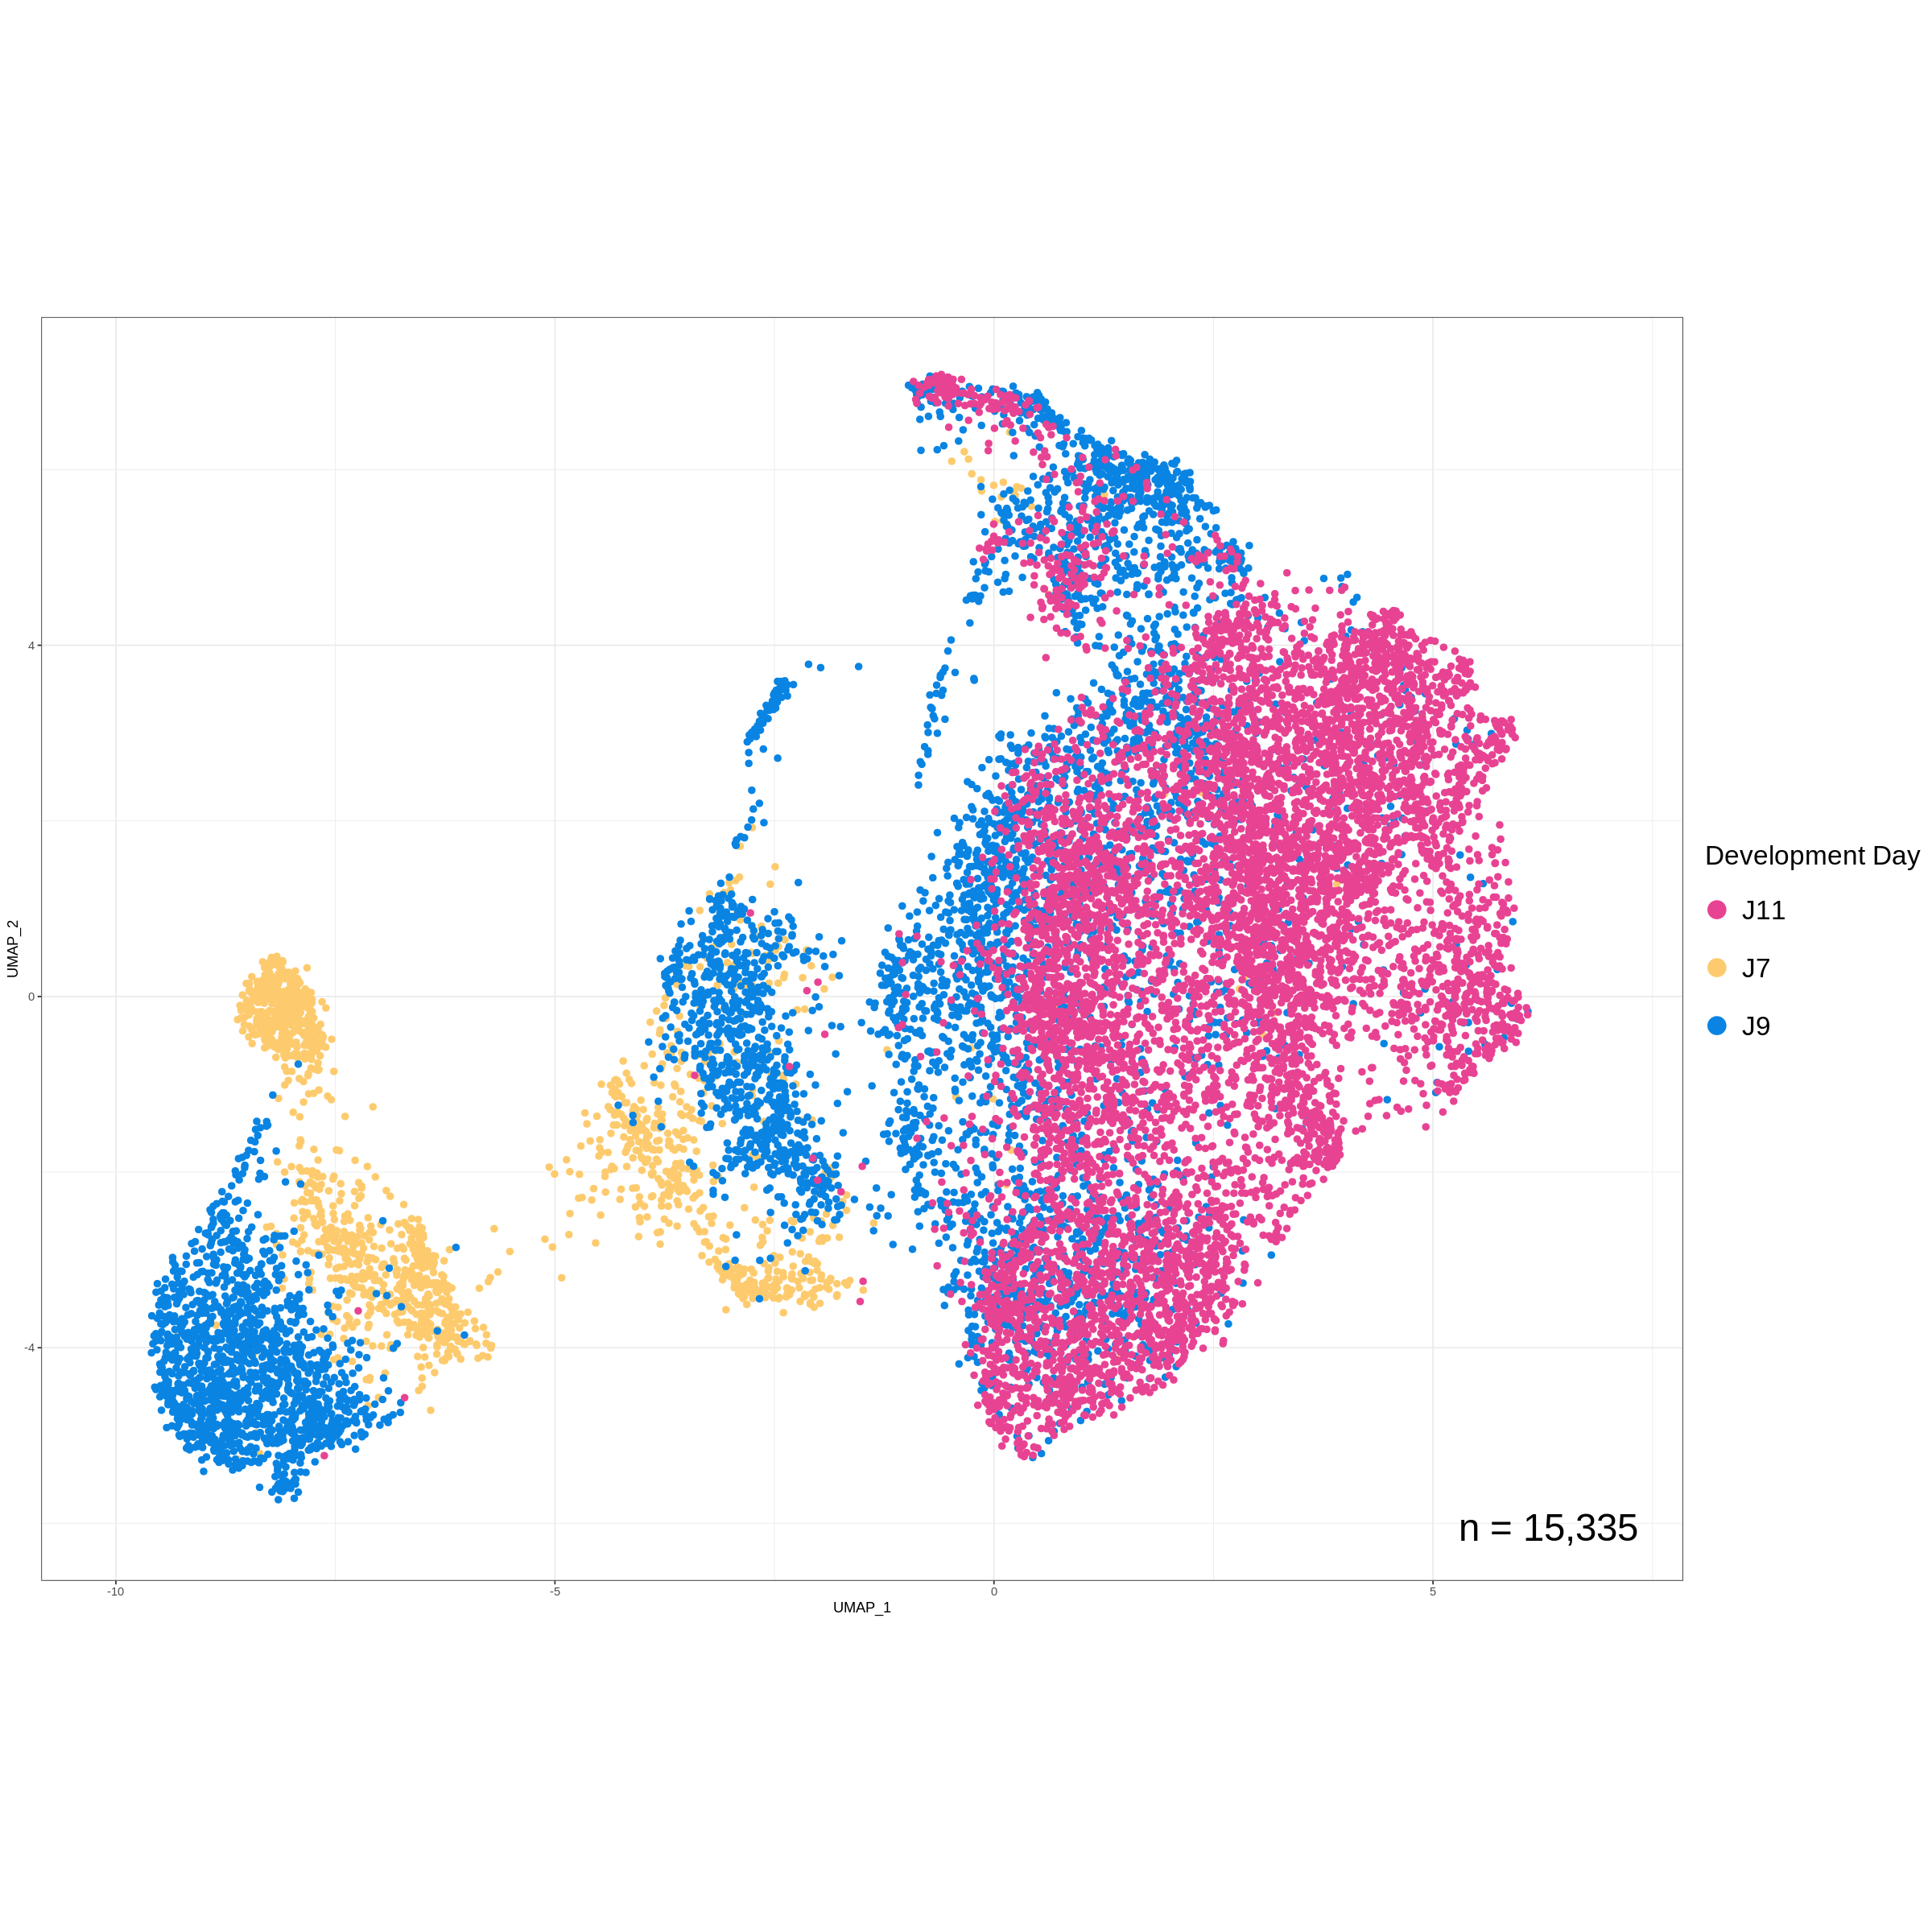

In [50]:
UMAP_centers_cell_type <- tibble(
    UMAP_1 = as.data.frame(embryo_hypo@reductions$umap@cell.embeddings)$UMAP_1,
    UMAP_2 = as.data.frame(embryo_hypo@reductions$umap@cell.embeddings)$UMAP_2,
    TIME = embryo_hypo@meta.data$TIME
  ) %>%
  group_by(TIME) %>%
  summarize(x = median(UMAP_1), y = median(UMAP_2)) %>%
  arrange(factor(TIME, levels = levels(c('D5','D7','D9','D11'))))

p <- bind_cols(embryo_hypo@meta.data, as.data.frame(embryo_hypo@reductions$umap@cell.embeddings)) %>%
  ggplot(aes(UMAP_1, UMAP_2, color = TIME)) +
  geom_point(size = 2) +
  theme_bw() +
  expand_limits(x = c(-10,7), y = c(-6,7)) +
  scale_color_manual(values = c("#e84393", "#fdcb6e", "#0984e3")) +
  labs(color = 'Development Day') +
  guides(colour = guide_legend(override.aes = list(size = 6))) +
  theme(legend.position = 'right',legend.title = element_text(size = 20),legend.text = element_text(size = 20), legend.key.height=unit(3,"line")) +
  coord_fixed() +
  annotate(
    geom = 'text', x = Inf, y = -Inf,
    label = paste0('n = ', format(nrow(embryo_hypo@meta.data), big.mark = ',', trim = TRUE)),
    vjust = -1.5, hjust = 1.25, color = 'black', size = 10
  )

p

In [51]:
ggsave('/home/adufour/work/notebook/plots/Hypoblast_time.svg', p, height = 28, width = 30)

In [42]:
SaveH5Seurat(embryo.integrated, filename = "/home/adufour/work/rds_storage/tissue/hypo_processed.h5Seurat")
Convert("/home/adufour/work/rds_storage/tissue/hypo_processed.h5Seurat", dest = "h5ad")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

Adding scale.data for RNA

Adding variable features for RNA

Adding feature-level metadata for RNA

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for harmony

Adding loadings for harmony

Adding projected loadings for harmony

No standard deviations for harmony

No JackStraw data for harmony

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap

No JackStraw data for umap

Validating h5Seurat file

Adding scale.data from RNA as X

Transfering meta.features to var

Adding data from RNA as raw

Transfering meta.features to raw/var

Transfering meta.data to obs

Adding dimensional reduction information for harmony

Adding feature loadings for harmony

Adding dimensional reduction information for pca

Adding f

In [38]:
saveRDS(embryo.integrated, file = "/home/adufour/work/rds_storage/tissue/hypo_processed.rds")

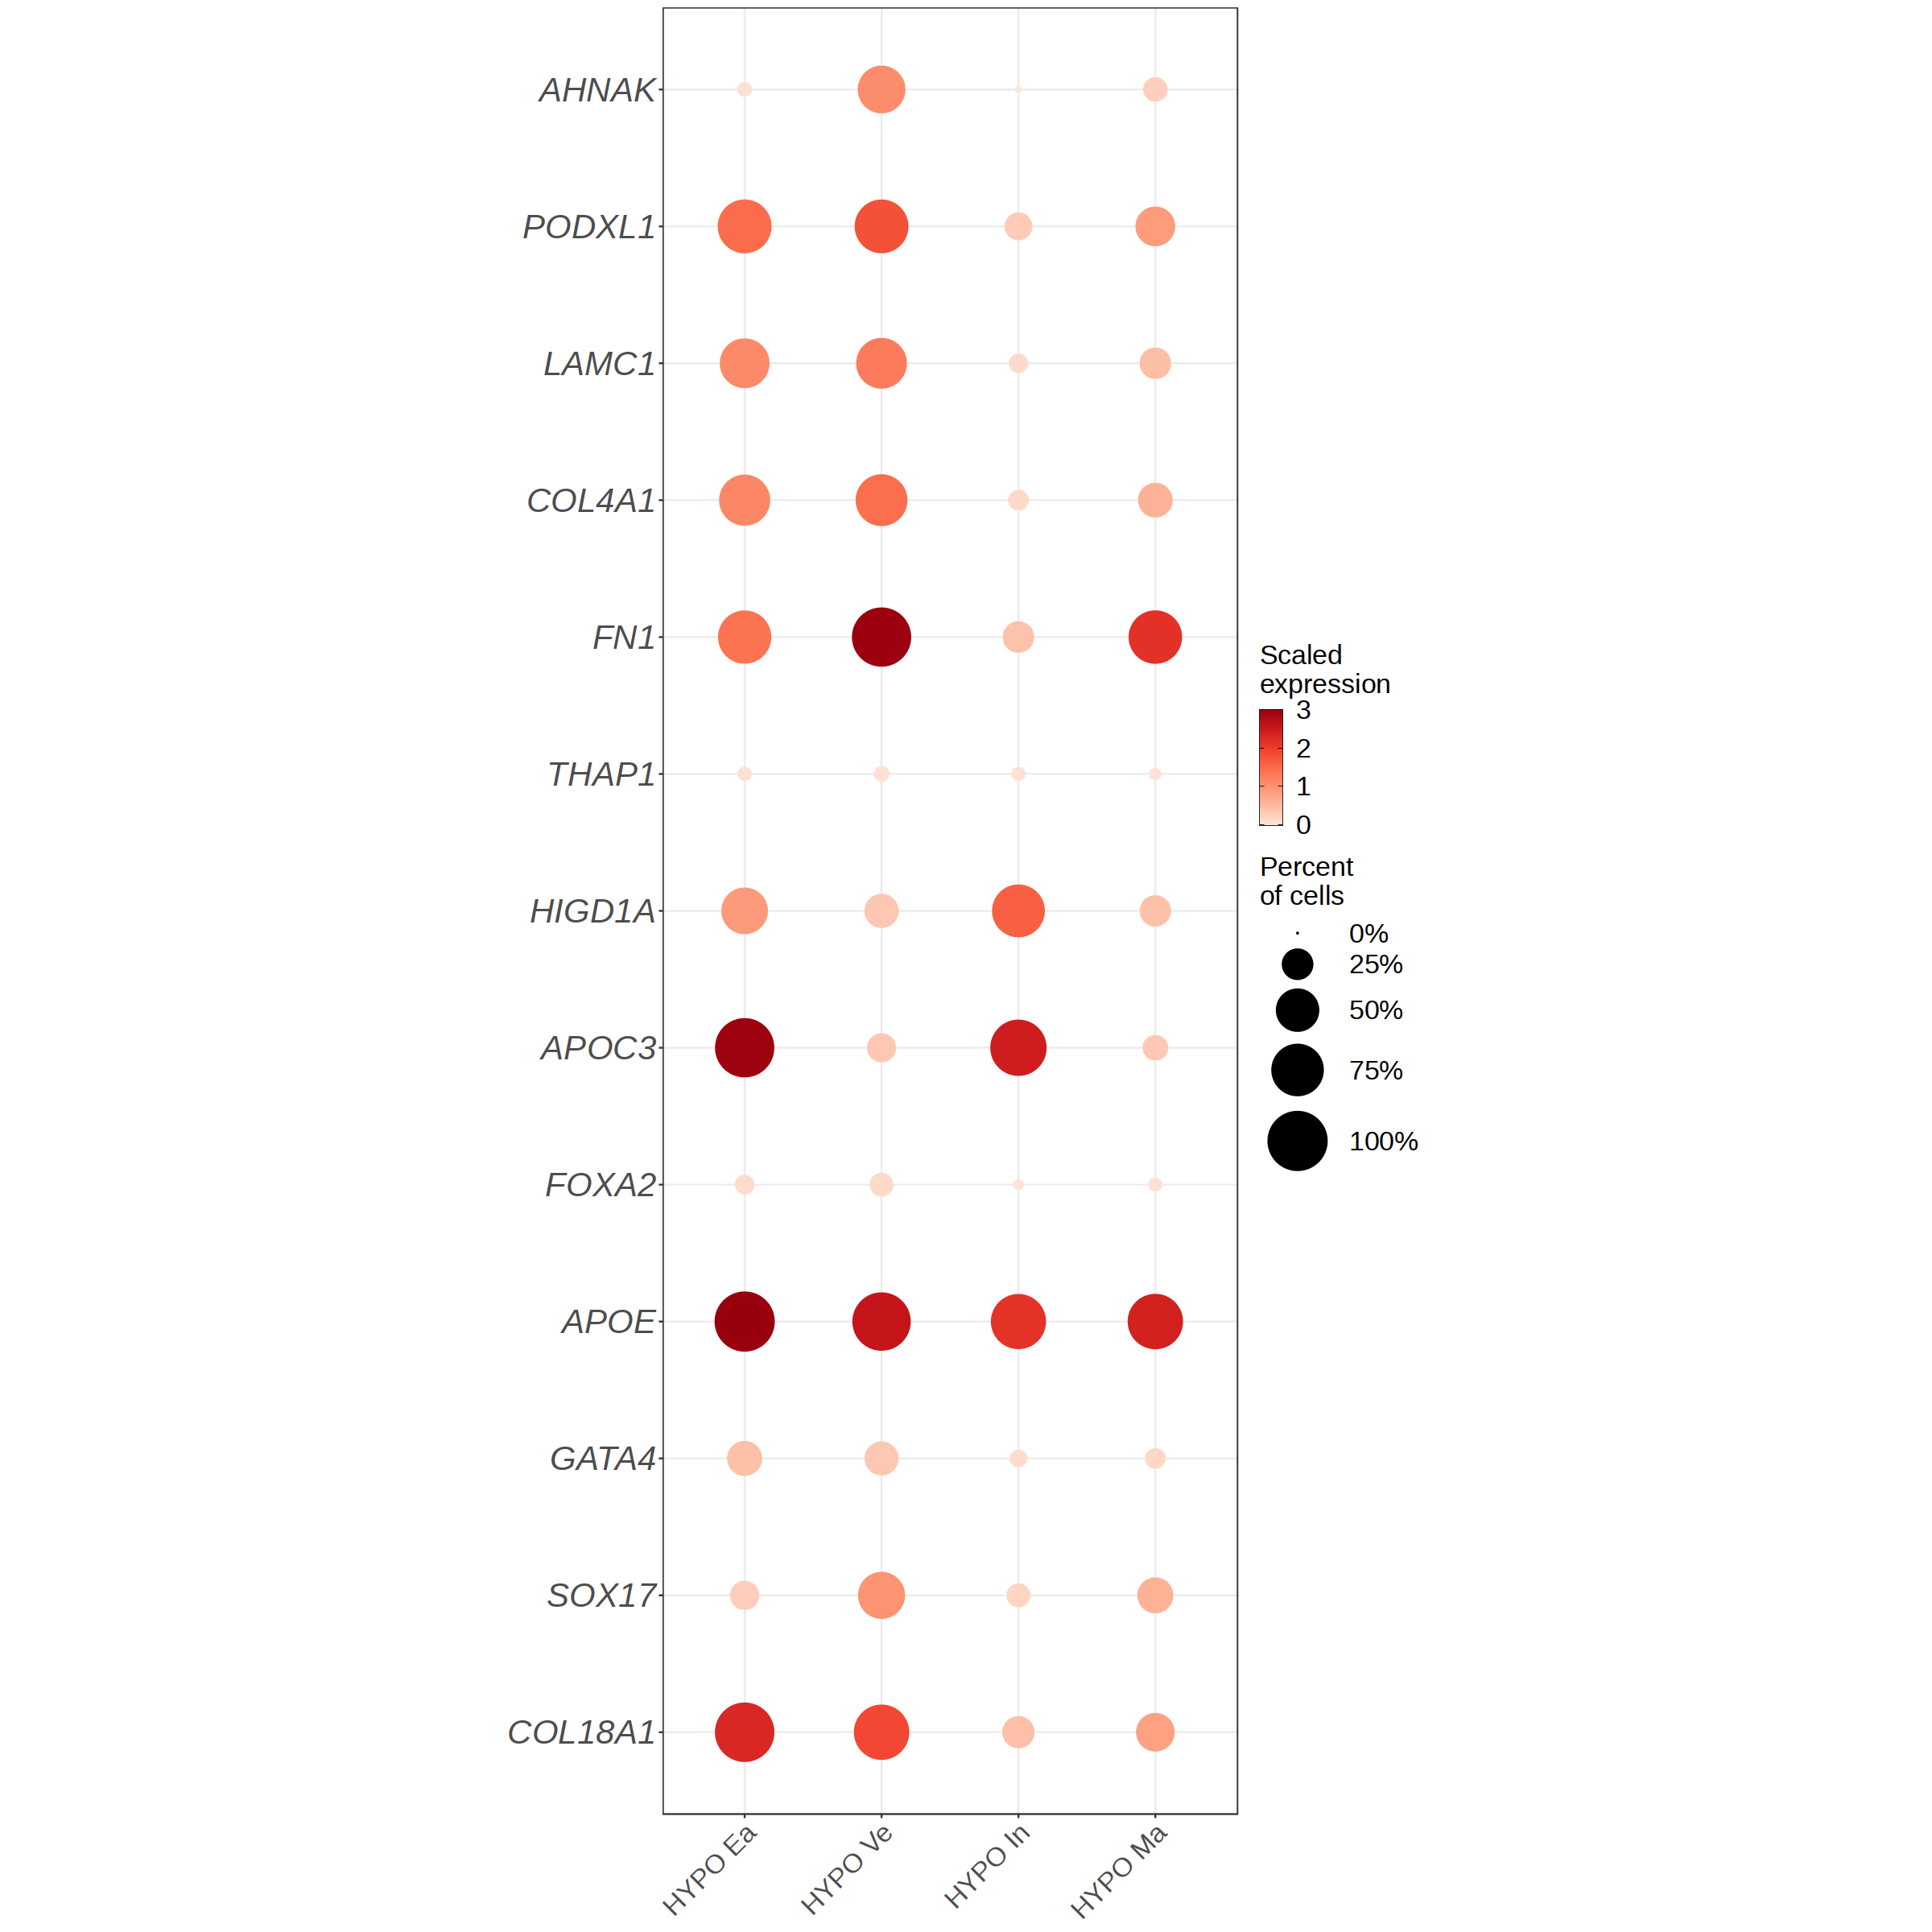

In [27]:
cluster_ids <- levels(embryo_hypo@meta.data$seurat_clusters)

# select a set of genes for which we want to show expression
genes_to_show <- c('COL18A1', 'SOX17', 'GATA4', 'APOE', 'FOXA2', 'ENSSSCG00000015069', 'ENSSSCG00000011290', 'THAP1', 'FN1', 'ENSSSCG00000044700', 
                   'LAMC1', 'ENSSSCG00000016548', 'ENSSSCG00000033010')

# for every cluster-gene combination, calculate the average expression across
# all cells and then transform the data into a data frame
expression_levels_per_cluster <- sapply(
    cluster_ids, function(x) {
      cells_in_current_cluster <- which(embryo_hypo@meta.data$seurat_clusters == x)
      Matrix::rowMeans(embryo_hypo@assays$RNA@data[genes_to_show,cells_in_current_cluster])
    }
  ) %>%
  t() %>%
  rescale(to=c(0,3)) %>%
  as.data.frame() %>%
  mutate(cluster = rownames(.)) %>%
  dplyr::select(cluster, everything()) %>%
  pivot_longer(
    cols = c(2:ncol(.)),
    names_to = 'gene'
  ) %>%
  dplyr::rename(expression = value) %>%
  mutate(id_to_merge = paste0(cluster, '_', gene))

# for every cluster-gene combination, calculate the percentage of cells in the
# respective group that has at least 1 transcript (this means we consider it
# as expressing the gene) and then transform the data into a data frame
percentage_of_cells_expressing_gene <- sapply(
    cluster_ids, function(x) {
      cells_in_current_cluster <- which(embryo_hypo@meta.data$seurat_clusters == x)
      Matrix::rowSums(embryo_hypo@assays$RNA@data[genes_to_show,cells_in_current_cluster] != 0)
    }
  ) %>%
  t() %>%
  as.data.frame() %>%
  mutate(cluster = rownames(.)) %>%
  dplyr::select(cluster, everything()) %>%
  pivot_longer(
    cols = c(2:ncol(.)),
    names_to = 'gene'
  ) %>%
  dplyr::rename(cell_count = value) %>%
  left_join(
    .,
    embryo_hypo@meta.data %>%
      group_by(seurat_clusters) %>%
      tally() %>%
      dplyr::rename(cluster = seurat_clusters),
    by = 'cluster') %>%
  mutate(
    id_to_merge = paste0(cluster, '_', gene),
    percent_cells = cell_count / n
  )

# merge the two data frames created before and plot the data
genes_to_show <- c('COL18A1', 'SOX17', 'GATA4', 'APOE', 'FOXA2', 'APOC3', 'HIGD1A', 'THAP1', 'FN1', 'COL4A1', 
                   'LAMC1', 'PODXL1', 'AHNAK')

p <- left_join(
    expression_levels_per_cluster,
    percentage_of_cells_expressing_gene %>%
    dplyr::select(id_to_merge, percent_cells),
    by = 'id_to_merge'
  ) %>%
  mutate(cluster = factor(cluster, levels = rev(cluster_ids))) %>%
  mutate(gene = factor(gene, levels = genes_to_show)) %>%
  ggplot(aes(cluster, gene)) +
  geom_point(aes(color = expression, size = percent_cells)) +
  scale_color_distiller(
    palette = 'Reds',
    direction = 1,
    name = 'Scaled\nexpression',
    limits = c(0, 3),
    guide = guide_colorbar(frame.colour = "black", ticks.colour = "black")
  ) +
  scale_size(name = 'Percent\nof cells', range = c(0,20), labels = scales::percent, limits = c(0, 1)) +
  labs(y = 'Cluster', color = 'Expression') +
  coord_fixed() +
  theme_bw() +
  theme(
    axis.title.x = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 20),
    legend.text = element_text(size = 20),
    legend.title = element_text(size = 20),
    axis.title.y = element_blank(),
    axis.text.y = element_text(size = 25, face = "italic")
  )

p

In [28]:
ggsave('/home/adufour/work/notebook/plots/Hypoblast/hypoblast_marker.svg', p, height = 10, width = 7)

In [109]:
table_clusters_by_cell_cycle <- embryo_hypo@meta.data %>%
  dplyr::rename(cluster = seurat_clusters) %>%
  group_by(cluster, TIME) %>%
  summarize(count = n()) %>%
  spread(TIME, count, fill = 0) %>%
  ungroup() %>%
  mutate(total_cell_count = rowSums(.[c(2:ncol(.))])) %>%
  dplyr::select(c('cluster', 'total_cell_count', everything())) %>%
  arrange(factor(cluster, levels = levels(embryo_hypo@meta.data$TIME)))

knitr::kable(table_clusters_by_cell_cycle)

`summarise()` has grouped output by 'cluster'. You can override using the `.groups` argument.




|cluster | total_cell_count|  J11|  J7|   J9|
|:-------|----------------:|----:|---:|----:|
|HYPO 1  |            10338| 7608|  31| 2699|
|HYPO 2  |             1992|    0| 566| 1426|
|HYPO 3  |             1402|   14| 553|  835|
|HYPO 4  |             1197|  303|  18|  876|
|HYPO 5  |              406|    0| 404|    2|

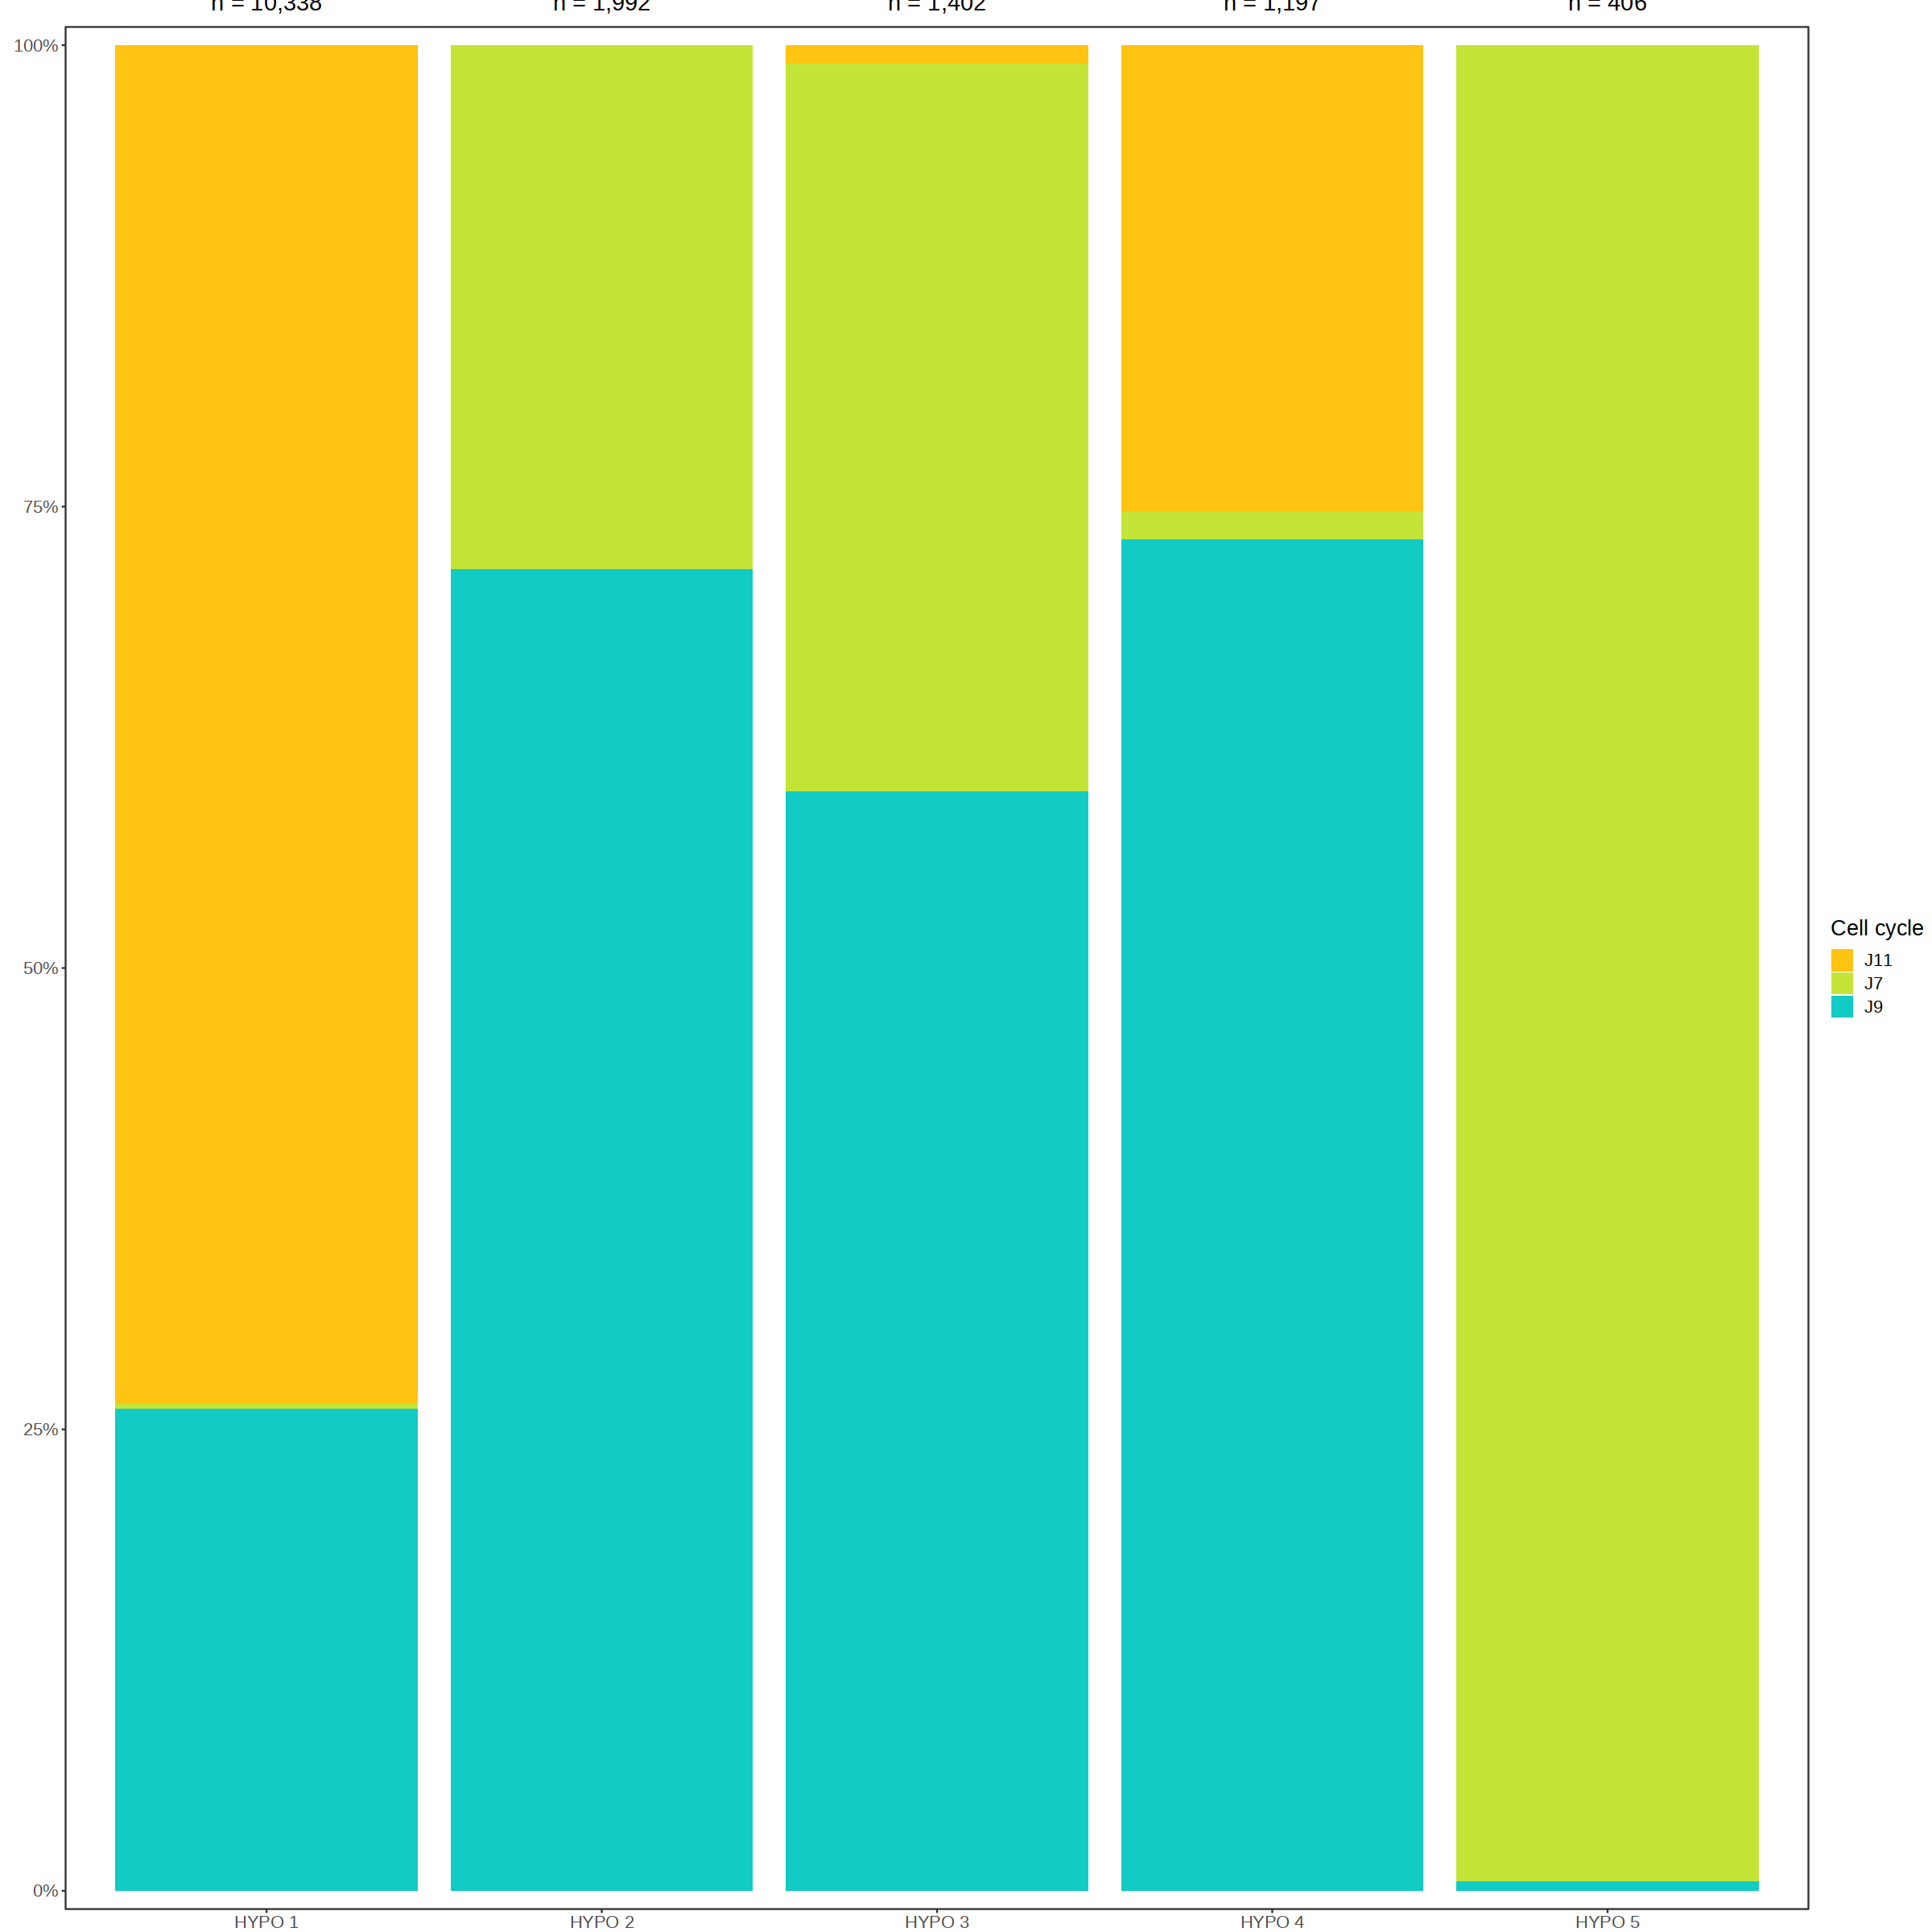

In [110]:
temp_labels <- embryo_hypo@meta.data %>%
  group_by(seurat_clusters) %>%
  tally() %>%
  dplyr::rename('cluster' = seurat_clusters)

p2 <- table_clusters_by_cell_cycle %>%
  dplyr::select(-c('total_cell_count')) %>%
  reshape2::melt(id.vars = 'cluster') %>%
  mutate(cluster = factor(cluster, levels = levels(embryo_hypo@meta.data$seurat_clusters))) %>%
  ggplot(aes(cluster, value)) +
  geom_bar(aes(fill = variable), position = 'fill', stat = 'identity') +
  geom_text(
    data = temp_labels,
    aes(x = cluster, y = Inf, label = paste0('n = ', format(n, big.mark = ',', trim = TRUE)), vjust = -1),
    color = 'black', size = 6
  ) +
  scale_fill_manual(name = 'Cell cycle', values = custom_colors$discrete) +
  scale_y_continuous(name = 'Percentage [%]', labels = scales::percent_format(), expand = c(0.01,0)) +
  coord_cartesian(clip = 'off') +
  theme_bw() +
  theme(
    legend.position = 'right',
    plot.title = element_text(hjust = 0.5),
    text = element_text(size = 16),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.title = element_blank(),
    plot.margin = margin(t = 20, r = 0, b = 0, l = 10, unit = 'pt')
  )

p2